# **Private Banking & Mercado Agregado: Análise Comparativa de Sensibilidade do Patrimônio Líquido de Fundos de Investimento à Variações em Indicadores Macroeconômicos**

##### Aluno - Rodrigo Rodrigues Guimarãis

## **1 - Introdução**

Este trabalho visa, através de uma análise comparativa do mercado de fundos de investimento brasileiro, testar a hipótese de que os recursos alocados no segmento de Private Banking teriam uma menor sensibilidade em relação às flutuações em indicadores macroeconômicos quando comparado com o agregado do mercado brasileiro de fundos de investimento.

A escolha pelo mercado de fundos de investimento se deu pois além de representar uma fatia significativa do total de ativos no segmento de Private Banking (40,6% em dezembro de 2023), a classificação dos fundos de investimento por força de regulamentação da CVM (Comissão de Valores Mobiliários) auxilia na identificação da estratégia de investimento do fundo (bem como seu benchmark), possibilitando a comparação/ análise de sensibilidade com o índice adequado.

A sensibilidade em questão será medida pelo Patrimônio Líquido do portfólio agregado e a variação desse Patrimônio Líquido frente às mudanças em indicadores macroeconômicos.

Os indicadores macroeconômicos selecionados para a análise serão a taxa básica de juros da economia brasileira (SELIC), o Ibovespa (principal indicador de desempenho médio do mercado de ações brasileiro) e a cotação do Dólar americano (USD/BRL).


## **2 - Exploração dos Dados**

Nessa sessão, os dados usados na análise serão pormenorizados, explorados e serão feitos os ajustes necessários para elaboração do estudo.

In [1]:
# Baixando pacotes utilizados no trabalho:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


In [2]:
# Carregando as bases de dados:

Totalizadores_Dados_Fundos_Private = pd.read_excel('/content/Dados Fundos Private.xlsx', sheet_name='Private_Totalizadores')

Fundos_Proprios_Dados_Fundos_Private = pd.read_excel('/content/Dados Fundos Private.xlsx', sheet_name='Private_Fundos_Próprios')

Fundos_Terceiros_Dados_Fundos_Private = pd.read_excel('/content/Dados Fundos Private.xlsx', sheet_name='Private_Fundos_Terceiros')

Fundos_Exclusivos_Dados_Fundos_Private = pd.read_excel('/content/Dados Fundos Private.xlsx', sheet_name='Private_Fundos_Exclusivos')

Fundos_Estruturados_Dados_Fundos_Private = pd.read_excel('/content/Dados Fundos Private.xlsx', sheet_name='Private_Fundos_Estruturados')

Volume_Financeiro_por_regiao_Dados_Geograficos_Private = pd.read_excel('/content/Dados Geográficos Private.xlsx', sheet_name='Private_Vol_Financeiro_Região')

Grupos_Economicos_por_regiao_Dados_Geograficos_Private = pd.read_excel('/content/Dados Geográficos Private.xlsx', sheet_name='Private_Grupos_Econ_Região')

Contas_por_regiao_Dados_Geograficos_Private = pd.read_excel('/content/Dados Geográficos Private.xlsx', sheet_name='Private_Contas_Região')

PL_Total_Dados_Mercado_Fundos = pd.read_excel('/content/Dados Indústria Fundos Brasil.xlsx', sheet_name='Mercado_PL_Total')

PL_por_Classe_Dados_Mercado_Fundos = pd.read_excel('/content/Dados Indústria Fundos Brasil.xlsx', sheet_name='Mercado_PL_Por_Classe')

Historico_Dolar = pd.read_excel('/content/Histórico Dólar.xlsx')

Historico_Ibovespa = pd.read_excel('/content/Histórico Ibovespa.xlsx')

Historico_Selic = pd.read_excel('/content/Histórico Selic.xlsx')


### **2.1 -Sobre os dados**

Os dados usados no trabalho foram obtidos de variadas fontes.

O período utilizado para elaboração das análises está compreendido entre outubro de 2015 e dezembro de 2023. A escolha deste período se deu para conciliar a disponibilidade de dados entre as diversas fontes.

Abaixo será pormenorizado a fonte de cada um deles, bem como uma breve explicação do que representam.

#### **2.1.1 - Dados do Mercado de Private Banking Brasileiro**

Os dados referentes ao mercado de Private Banking do Brasil foram extraídos das estatísticas publicadas pela ANBIMA (Associação Brasileira das Entidades dos Mercados Financeiro e de Capitais).

A ANBIMA, instituição de autoregulação do mercado financeiro brasileiro, publica mensalmente os dados agregados do mercado de Private Banking do Brasil. Os dados são enviados pelas instituições participantes e posteriormente compilados e publicados pela ANBIMA.

Os dados são publicados no link abaixo:

https://www.anbima.com.br/pt_br/informar/estatisticas/varejo-private-e-gestores-de-patrimonio/private-consolidado-mensal.htm

A partir dessa publicação, foram extraídas as informações acerca do volume total em fundos de investimento, bem como sua segmentação nas diversas classes.

Também foi possível extrair os dados regionalizados de volume, numero de grupos econômicos e contas no mercado de Private Banking.


#### **2.1.2 - Dados do Mercado de Fundos de Investimento Brasileiro**

De forma análoga à publicação referente ao mercado de Private Banking, a ANBIMA também publica mensalmente os dados referentes ao consolidado do mercado de fundos de investimento no Brasil.

Os dados utilizados neste trabalho foram extraídos dessa publicação, chamada de Boletim de Fundos de Investimento. Através dela foi possível extrair volume total em fundos de investimento no Brasil e sua alocação nas diversas classes.

O boletim pode ser consultado no link abaixo:

https://www.anbima.com.br/pt_br/informar/relatorios/fundos-de-investimento/boletim-de-fundos-de-investimentos/boletim-de-fundos-de-investimentos.htm


#### **2.1.3 - SELIC**

A taxa básica de juros da economia brasileira, a SELIC, é determinada e publicada pelo Banco Central do Brasil.

As informações podem ser obtidas no link abaixo:

https://www.bcb.gov.br/controleinflacao/historicotaxasjuros


#### **2.1.4 - Ibovespa**

O Ibovespa, principal índice de desempenho médio do mercado de ações brasileiro, é calculado e divulgado pela B3, bolsa de valores brasileira.

Os dados podem ser consultados no link abaixo:

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-estatisticas-historicas.htm


#### **2.1.5 - Dólar (USD/BRL)**

A cotação do Dólar Americano frente ao Real foi retirada do IpeaData, portal de divulgação de dapos do Ipea (Instituto de Pesquisa Econômica Aplicada).

Os dados podem ser consultados no link:

http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=32098&module=M

### **2.2 - Exploratory Data Analysis (EDA)**

Abaixo será feita a análise exploratória dos dados obtidos.

Cabe ressaltar que, devido a formatações impróprias para captura dos dados diretamente em algumas publicações, os dados foram pré-trabalhados em planilhas do Excel e, em grande medida, estão prontos para uso.

#### **Totalizadores dos Dados Private**

A tabela *Totalizadores_Dados_Fundos_Private* concentra os dados agregados do Mercado de Private Banking brasileiro.

Os dados da planilha estão no formato (R$ milhões).

**Volume_Financeiro_Total_Private**	- Se refere ao total do volume financeiro do mercado de Private Banking do Brasil (tanto em fundos de investimento quanto em outros ativos).

**PL_Total_Fundos_Private** - Se refere ao Patrimônio Líquido total dos fundos de investimento no mercado de Private Banking do Brasil.

**PL_Total_Renda_Fixa_Private** - Se refere ao Patrimônio Líquido total dos fundos de investimento da classe de Renda Fixa no mercado de Private Banking do Brasil. Trata-se da soma dos dados das colunas PL_Total_Renda_Fixa_Duração_Baixa_Private e PL_Total_Renda_Fixa_Outros_Private.

**PL_Total_Renda_Fixa_Duração_Baixa_Private** -  Se refere ao Patrimônio Líquido total dos fundos de investimento da classe de Renda Fixa - Duração Baixa no mercado de Private Banking do Brasil.

**PL_Total_Renda_Fixa_Outros_Private** -  Se refere ao Patrimônio Líquido total dos fundos de investimento da classe de Renda Fixa (excluindo os de Duração Baixa) no mercado de Private Banking do Brasil.

**PL_Total_Multimercados_Private** Se refere ao Patrimônio Líquido total dos fundos de investimento da classe de Multimercados no mercado de Private Banking do Brasil.

**PL_Total_Ações_Private** - Se refere ao Patrimônio Líquido total dos fundos de investimento da classe de Ações no mercado de Private Banking do Brasil.

**PL_Total_Cambial_Private** - Se refere ao Patrimônio Líquido total dos fundos de investimento da classe Cambial no mercado de Private Banking do Brasil.





In [ ]:
#Totalizadores dos Dados Private - Head

Totalizadores_Dados_Fundos_Private.head()



,Data,Volume_Financeiro_Total_Private,PL_Total_Fundos_Private,PL_Total_Renda_Fixa_Private,PL_Total_Renda_Fixa_Duração_Baixa_Private,PL_Total_Renda_Fixa_Outros_Private,PL_Total_ Multimercados_Private,PL_Total_Ações_Private,PL_Total_Cambial_Private
0,2023-12-01,2.117062e+06,787336.886281,121633.993240,50952.834740,70681.158500,461197.837604,163493.798729,476.771062
1,2023-11-01,2.056709e+06,776694.958248,118585.142217,50119.361011,68465.781206,471967.199775,145384.031492,494.569008
2,2023-10-01,1.979452e+06,759599.098135,118953.504946,51390.654138,67562.850809,468832.764887,131385.515735,512.278137
3,2023-09-01,2.019471e+06,777894.120838,117510.466133,51674.889697,65835.576436,476877.904433,142953.850902,535.397568
4,2023-08-01,1.993916e+06,773938.977001,115943.622652,50896.946096,65046.676556,474735.330086,142854.695932,542.554918


In [ ]:
#Totalizadores dos Dados Private - Info

Totalizadores_Dados_Fundos_Private.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Data                                       99 non-null     datetime64[ns]
 1   Volume_Financeiro_Total_Private            99 non-null     float64       
 2   PL_Total_Fundos_Private                    99 non-null     float64       
 3   PL_Total_Renda_Fixa_Private                99 non-null     float64       
 4   PL_Total_Renda_Fixa_Duração_Baixa_Private  99 non-null     float64       
 5   PL_Total_Renda_Fixa_Outros_Private         99 non-null     float64       
 6   PL_Total_ Multimercados_Private            99 non-null     float64       
 7   PL_Total_Ações_Private                     99 non-null     float64       
 8   PL_Total_Cambial_Private                   99 non-null     float64       
dtypes: datetime64[ns](1), fl

In [ ]:
#Totalizadores dos Dados Private - Describe

Totalizadores_Dados_Fundos_Private.describe()

,Volume_Financeiro_Total_Private,PL_Total_Fundos_Private,PL_Total_Renda_Fixa_Private,PL_Total_Renda_Fixa_Duração_Baixa_Private,PL_Total_Renda_Fixa_Outros_Private,PL_Total_ Multimercados_Private,PL_Total_Ações_Private,PL_Total_Cambial_Private
count,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1.326092e+06,591437.842374,103469.036067,62956.099151,40512.936916,365763.652876,87760.837985,648.735435
std,4.302662e+05,163357.214461,13362.675582,11267.818812,10926.931364,112099.908836,52254.031808,247.808793
min,7.030298e+05,312763.145415,81098.963963,45364.694052,20846.590965,176548.574424,16757.854227,353.996619
25%,9.532169e+05,445005.047455,90187.854502,53563.634657,33650.896097,264168.522704,27524.535754,474.737420
50%,1.229923e+06,619508.507885,108381.603634,59440.870790,37448.594541,400136.259545,86327.469875,608.667794
75%,1.769050e+06,756028.178159,114921.263004,75017.615497,43117.852409,471327.982184,139187.707429,737.381060
max,2.117062e+06,790507.324069,121922.025932,84115.897102,70681.158500,498404.023455,169843.962025,1443.709576


In [ ]:
#Totalizadores dos Dados Private - Checagem de NA

Totalizadores_Dados_Fundos_Private.isnull().sum()

Data                                         0
Volume_Financeiro_Total_Private              0
PL_Total_Fundos_Private                      0
PL_Total_Renda_Fixa_Private                  0
PL_Total_Renda_Fixa_Duração_Baixa_Private    0
PL_Total_Renda_Fixa_Outros_Private           0
PL_Total_ Multimercados_Private              0
PL_Total_Ações_Private                       0
PL_Total_Cambial_Private                     0
dtype: int64

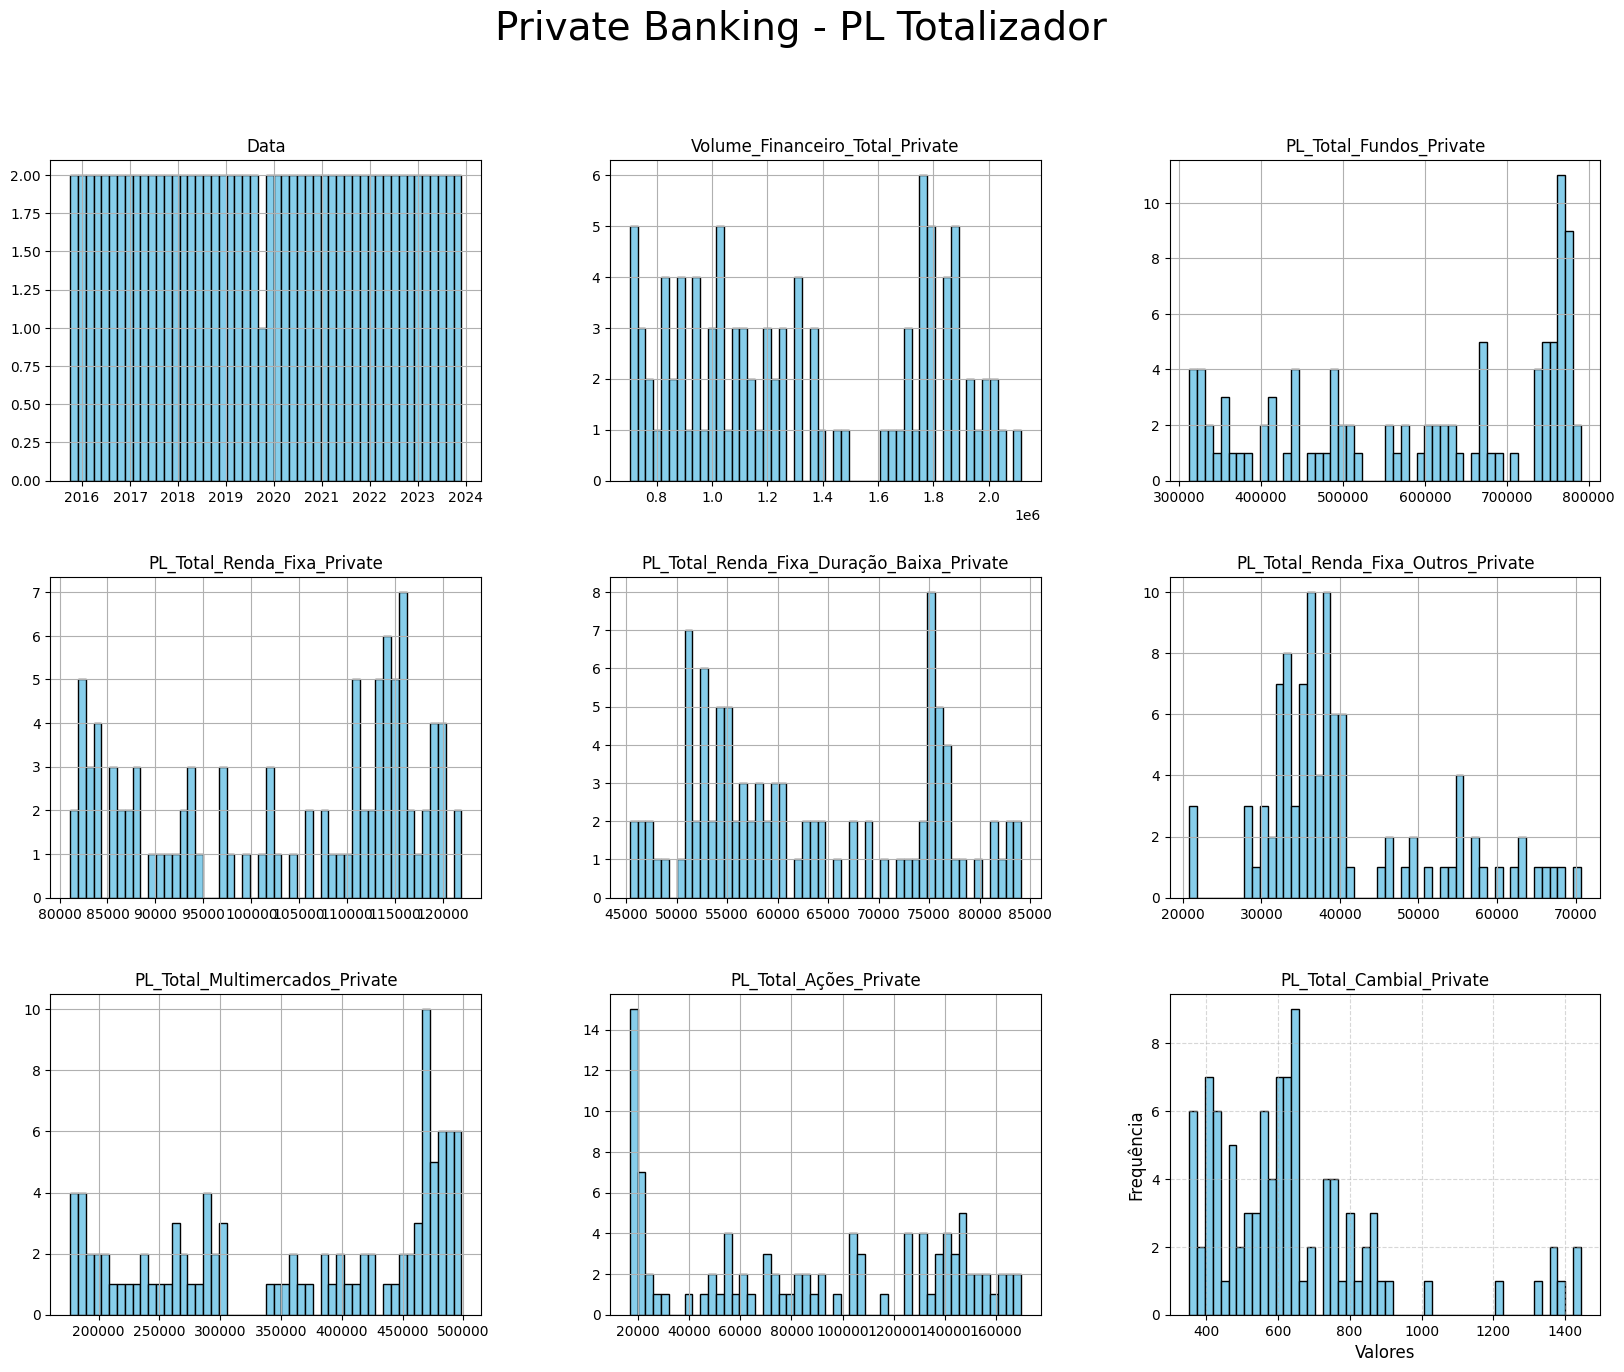

In [26]:
#Histograma dos dados da planilha "Totalizadores_Dados_Fundos_Private"

Totalizadores_Dados_Fundos_Private.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Private Banking - PL Totalizador', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Volume Private em Fundos Próprios**

A tabela *Fundos_Proprios_Dados_Fundos_Private* agrega o Patrimônio Líquido Total vinculado aos fundos próprios no mercado de Private Banking brasileiro.

Nesse contexto, fundos próprios são aqueles administrados pela própria instituição que detém a conta do cliente Private.

Os dados da planilha estão no formato (R$ milhões).

**Renda_Fixa_Duração_Baixa_Fundos_Proprios_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, de administração própria, da classe de Renda Fixa - Duração Baixa.

**Renda_Fixa_Outros_Fundos_Proprios_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, de administração própria, da classe de Renda Fixa (exceto os de Duração Baixa).

**Multimercados_Fundos_Proprios_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, de administração própria, da classe de Multimercados.

**Ações_Fundos_Proprios_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, de administração própria, da classe de Ações.

**Cambial_Fundos_Proprios_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, de administração própria, da classe de Cambial.

In [ ]:
#Volume Private em Fundos Próprios - Head

Fundos_Proprios_Dados_Fundos_Private.head()

,Data,Renda_Fixa_Duração_Baixa_Fundos_Proprios_Private,Renda_Fixa_Outros_Fundos_Proprios_Private,Multimercados_Fundos_Proprios_Private,Ações_Fundos_Proprios_Private,Cambial_Fundos_Proprios_Private
0,2023-12-01,48565.698297,47118.039342,74137.124281,41767.623117,452.345411
1,2023-11-01,47643.701913,46494.292790,74296.188919,35070.081650,467.310282
2,2023-10-01,48995.825523,46241.375982,72976.566216,31254.606281,484.980636
3,2023-09-01,49048.390480,45674.064844,74626.520134,33080.577266,506.890518
4,2023-08-01,48323.540934,45052.881181,74427.479446,34435.515400,514.599727


In [ ]:
#Volume Private em Fundos Próprios - Info

Fundos_Proprios_Dados_Fundos_Private.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Data                                              99 non-null     datetime64[ns]
 1   Renda_Fixa_Duração_Baixa_Fundos_Proprios_Private  99 non-null     float64       
 2   Renda_Fixa_Outros_Fundos_Proprios_Private         99 non-null     float64       
 3   Multimercados_Fundos_Proprios_Private             99 non-null     float64       
 4   Ações_Fundos_Proprios_Private                     99 non-null     float64       
 5   Cambial_Fundos_Proprios_Private                   99 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.8 KB


In [ ]:
#Volume Private em Fundos Próprios - Describe

Fundos_Proprios_Dados_Fundos_Private.describe()

,Renda_Fixa_Duração_Baixa_Fundos_Proprios_Private,Renda_Fixa_Outros_Fundos_Proprios_Private,Multimercados_Fundos_Proprios_Private,Ações_Fundos_Proprios_Private,Cambial_Fundos_Proprios_Private
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,56405.012422,31888.180300,78476.963829,22789.315519,595.448062
std,9760.270335,6981.087176,21637.953384,17485.141067,241.962952
min,42679.880850,15195.082026,34881.622628,2404.653703,319.099572
25%,48765.992212,25501.352271,71367.813958,4822.253243,448.005215
50%,54019.404834,33149.336004,84581.816584,21041.405360,538.864420
75%,64528.652312,35128.775430,94122.110768,35423.432686,662.626481
max,75197.656321,47118.039342,107982.302300,60663.584887,1391.848595


In [ ]:
#Volume Private em Fundos Próprios - Checagem de NA

Fundos_Proprios_Dados_Fundos_Private.isnull().sum()

Data                                                0
Renda_Fixa_Duração_Baixa_Fundos_Proprios_Private    0
Renda_Fixa_Outros_Fundos_Proprios_Private           0
Multimercados_Fundos_Proprios_Private               0
Ações_Fundos_Proprios_Private                       0
Cambial_Fundos_Proprios_Private                     0
dtype: int64

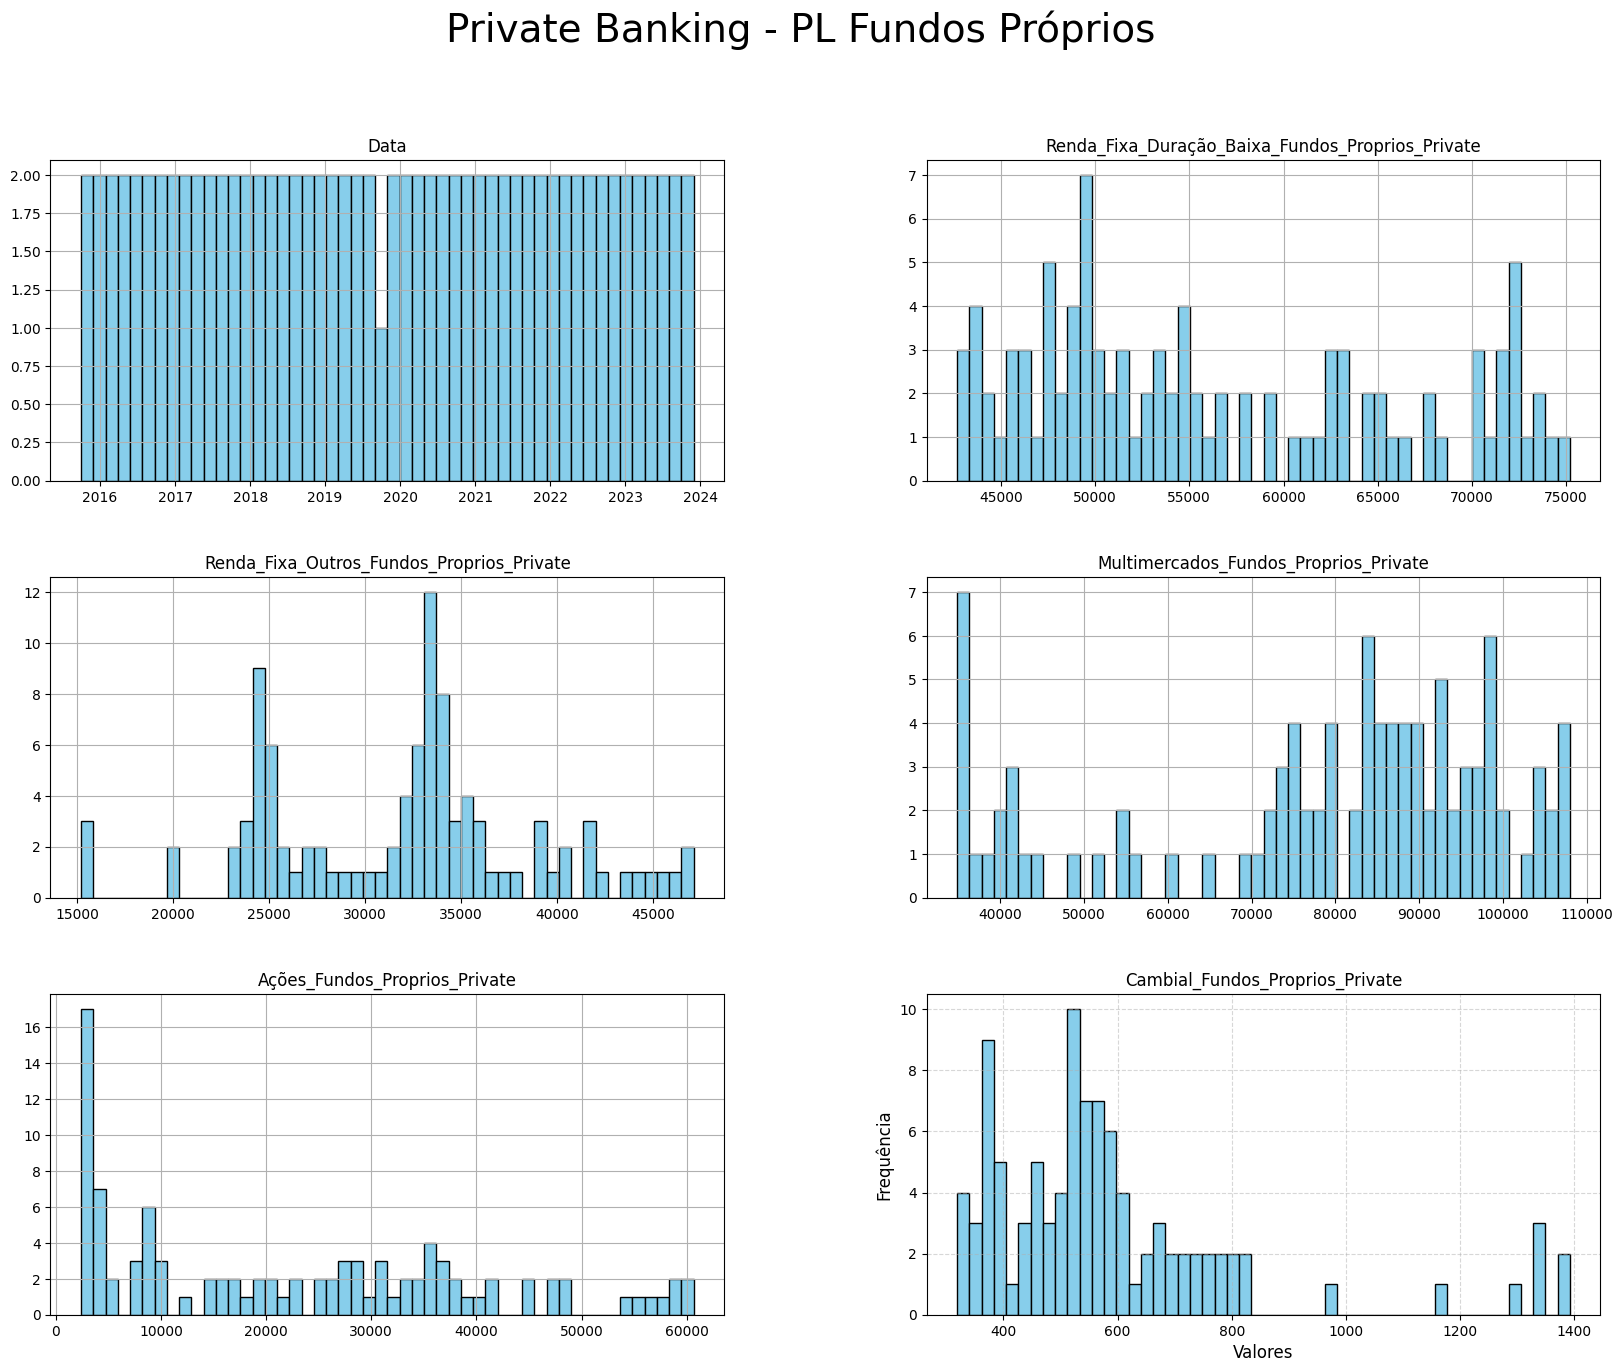

In [25]:
#Histograma dos dados da planilha "Fundos_Proprios_Dados_Fundos_Private"

Fundos_Proprios_Dados_Fundos_Private.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Private Banking - PL Fundos Próprios', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Volume Private em Fundos de Terceiros**

A tabela *Fundos_Terceiros_Dados_Fundos_Private* agrega o Patrimônio Líquido Total vinculado aos fundos de terceiros no mercado de Private Banking brasileiro.

Fundos de terceiros são aqueles que **não são administrados** pela própria instituição que detém a conta do cliente Private.

Os dados da planilha estão no formato (R$ milhões).

**Renda_Fixa_Duração_Baixa_Fundos_Terceiros_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, administrado por terceiros, da classe de Renda Fixa - Duração Baixa.

**Renda_Fixa_Outros_Fundos_Terceiros_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, administrado por terceiros, da classe de Renda Fixa (exceto os de Duração Baixa).

**Multimercados_Fundos_Terceiros_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, administrado por terceiros, da classe de Multimercados.

**Ações_Fundos_Terceiros_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, administrado por terceiros, da classe de Ações.

**Cambial_Fundos_Terceiros_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento, administrado por terceiros, da classe Cambial.

In [ ]:
#Volume Private em Fundos de Terceiros - Head

Fundos_Terceiros_Dados_Fundos_Private.head()

,Data,Renda_Fixa_Duração_Baixa_Fundos_Terceiros_Private,Renda_Fixa_Outros_Fundos_Terceiros_Private,Multimercados_Fundos_Terceiros_Private,Ações_Fundos_Terceiros_Private,Cambial_Fundos_Terceiros_Private
0,2023-12-01,1133.370248,11077.246482,73162.538076,32344.146531,24.425651
1,2023-11-01,1161.434892,10226.004352,76293.732397,29728.907340,27.258726
2,2023-10-01,1081.197756,10208.504587,75235.848918,27862.286603,27.297501
3,2023-09-01,1151.634992,9442.261787,74702.233939,32161.514443,28.507050
4,2023-08-01,1084.582819,9499.525843,73734.237720,30706.711486,27.955191


In [ ]:
#Volume Private em Fundos de Terceiros - Info

Fundos_Terceiros_Dados_Fundos_Private.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Data                                               99 non-null     datetime64[ns]
 1   Renda_Fixa_Duração_Baixa_Fundos_Terceiros_Private  99 non-null     float64       
 2   Renda_Fixa_Outros_Fundos_Terceiros_Private         99 non-null     float64       
 3   Multimercados_Fundos_Terceiros_Private             99 non-null     float64       
 4   Ações_Fundos_Terceiros_Private                     99 non-null     float64       
 5   Cambial_Fundos_Terceiros_Private                   99 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.8 KB


In [ ]:
#Volume Private em Fundos de Terceiros - Describe

Fundos_Terceiros_Dados_Fundos_Private.describe()

,Renda_Fixa_Duração_Baixa_Fundos_Terceiros_Private,Renda_Fixa_Outros_Fundos_Terceiros_Private,Multimercados_Fundos_Terceiros_Private,Ações_Fundos_Terceiros_Private,Cambial_Fundos_Terceiros_Private
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1434.771091,3292.331642,50004.598573,21105.177137,52.867466
std,602.355479,3131.134420,22815.459100,10469.350191,27.939534
min,780.970417,521.337431,11134.628811,3376.099350,14.142021
25%,1014.427103,779.041114,28143.154099,10117.539871,33.463457
50%,1190.472180,1959.119221,60267.172162,23242.867294,45.515984
75%,1844.772878,5053.008640,69582.637598,29444.076464,74.236088
max,4039.337428,12732.588141,84748.110958,38701.487221,206.381865


In [ ]:
#Volume Private em Fundos de Terceiros - Checagem de NA

Fundos_Terceiros_Dados_Fundos_Private.isnull().sum()

Data                                                 0
Renda_Fixa_Duração_Baixa_Fundos_Terceiros_Private    0
Renda_Fixa_Outros_Fundos_Terceiros_Private           0
Multimercados_Fundos_Terceiros_Private               0
Ações_Fundos_Terceiros_Private                       0
Cambial_Fundos_Terceiros_Private                     0
dtype: int64

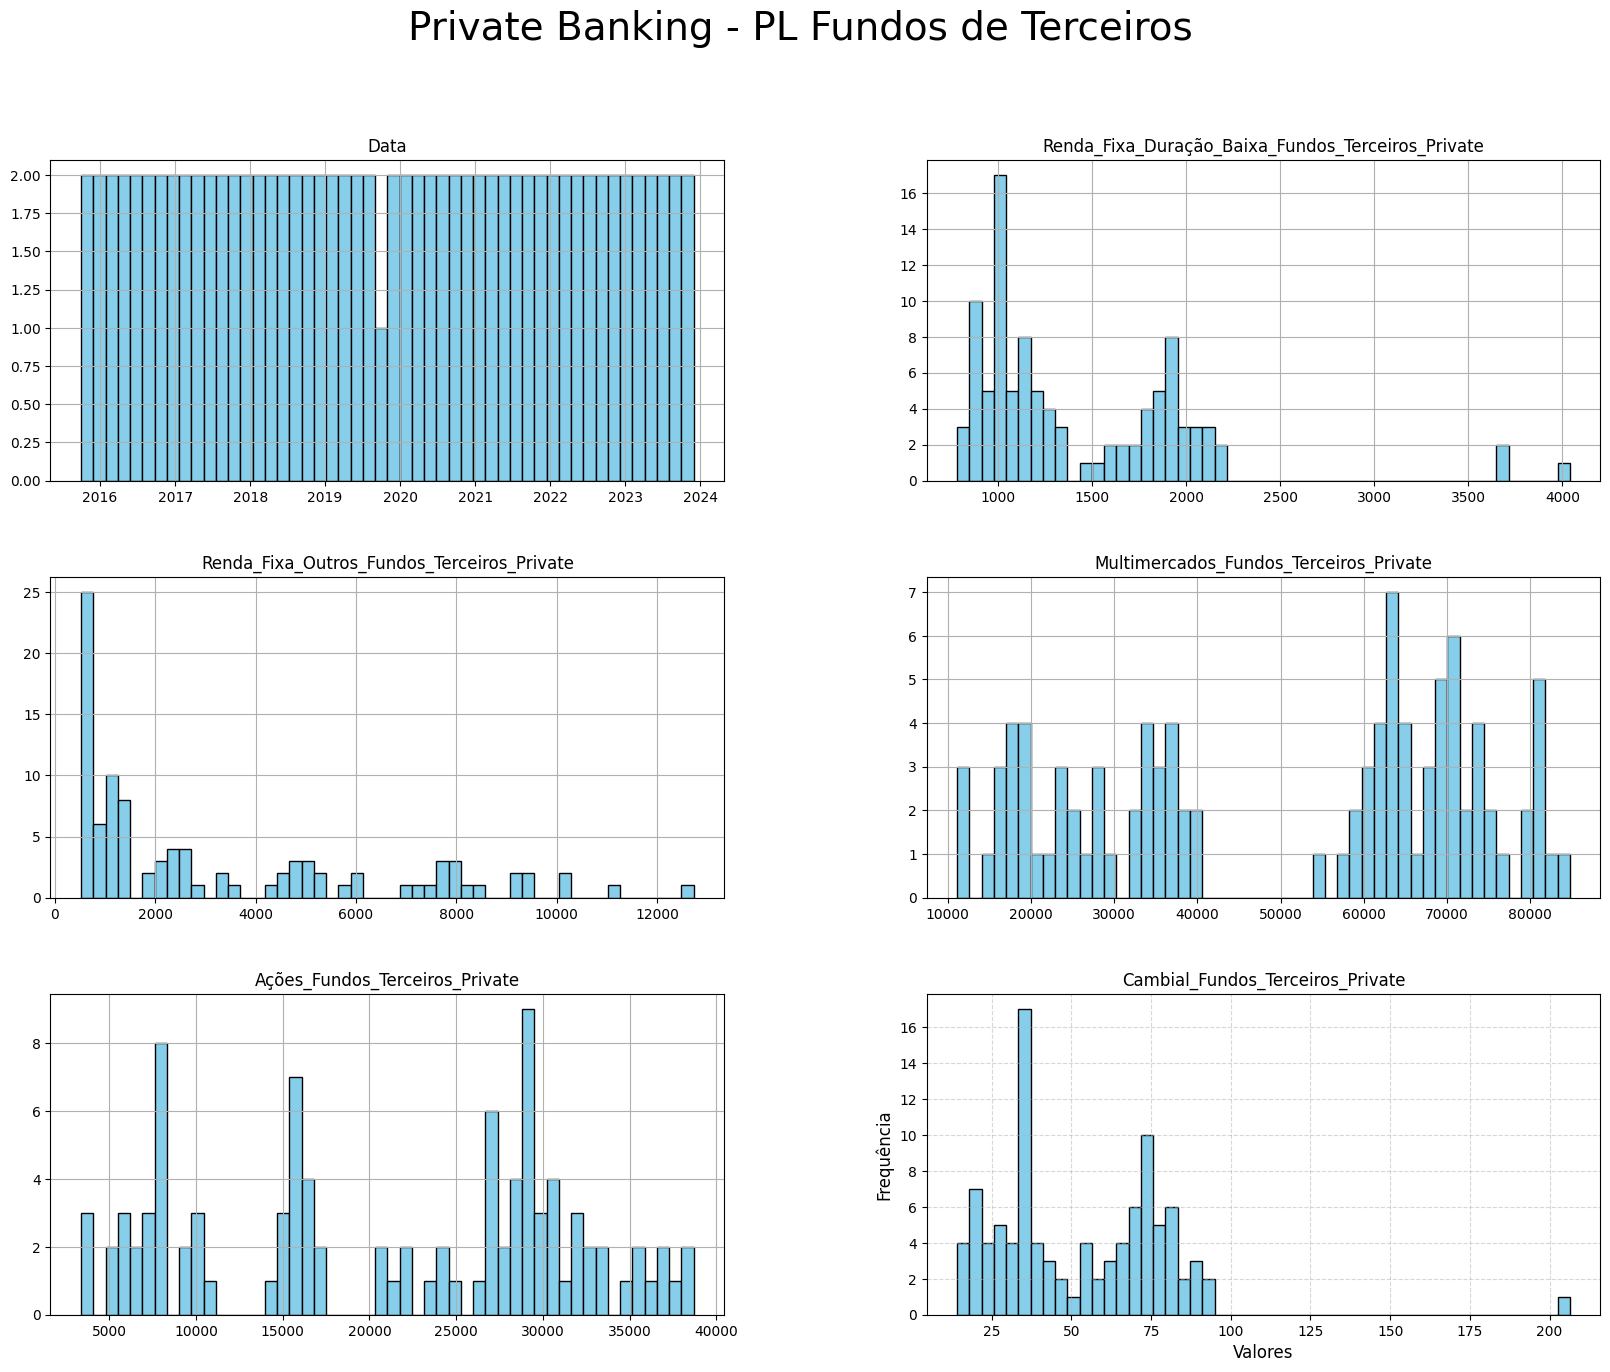

In [24]:
#Histograma dos dados da planilha "Fundos_Terceiros_Dados_Fundos_Private"

Fundos_Terceiros_Dados_Fundos_Private.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Private Banking - PL Fundos de Terceiros', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Volume Private em Fundos Exclusivos**

A tabela *Fundos_Exclusivos_Dados_Fundos_Private* agrega o Patrimônio Líquido Total vinculado aos fundos exclusivos no mercado de Private Banking brasileiro.

Fundos Exclusivos são aqueles montados exclusivamente para um cotista (cliente).

Os dados da planilha estão no formato (R$ milhões).

**Renda_Fixa_Duração_Baixa_Fundos_Exclusivos_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento exclusivos da classe de Renda Fixa - Duração Baixa.

**Renda_Fixa_Outros_Fundos_Exclusivos_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento exclusivos da classe de Renda Fixa (exceto os de Duração Baixa).

**Multimercados_Fundos_Exclusivos_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento exclusivos da classe de Multimercados.

**Ações_Fundos_Exclusivos_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento exclusivos da classe de Ações.

**Cambial_Fundos_Exclusivos_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento exclusivos da classe Cambial.

In [ ]:
#Volume Private em Fundos Exclusivos - Head

Fundos_Exclusivos_Dados_Fundos_Private.head()

,Data,Renda_Fixa_Duração_Baixa_Fundos_Exclusivos_Private,Renda_Fixa_Outros_Fundos_Exclusivos_Private,Multimercados_Fundos_Exclusivos_Private,Ações_Fundos_Exclusivos_Private,Cambial_Fundos_Exclusivos_Private
0,2023-12-01,1253.766196,12485.872677,313898.175247,89382.029082,0.0
1,2023-11-01,1314.224206,11745.484063,321377.278459,80585.042502,0.0
2,2023-10-01,1313.630859,11112.970240,320620.349754,72268.622851,0.0
3,2023-09-01,1474.864224,10719.249805,327549.150360,77711.759192,0.0
4,2023-08-01,1488.822343,10494.269532,326573.612920,77712.469046,0.0


In [ ]:
#Volume Private em Fundos Exclusivos - Info

Fundos_Exclusivos_Dados_Fundos_Private.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Data                                                99 non-null     datetime64[ns]
 1   Renda_Fixa_Duração_Baixa_Fundos_Exclusivos_Private  99 non-null     float64       
 2   Renda_Fixa_Outros_Fundos_Exclusivos_Private         99 non-null     float64       
 3   Multimercados_Fundos_Exclusivos_Private             99 non-null     float64       
 4   Ações_Fundos_Exclusivos_Private                     99 non-null     float64       
 5   Cambial_Fundos_Exclusivos_Private                   99 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.8 KB


In [ ]:
#Volume Private em Fundos Exclusivos - Describe

Fundos_Exclusivos_Dados_Fundos_Private.describe()

,Renda_Fixa_Duração_Baixa_Fundos_Exclusivos_Private,Renda_Fixa_Outros_Fundos_Exclusivos_Private,Multimercados_Fundos_Exclusivos_Private,Ações_Fundos_Exclusivos_Private,Cambial_Fundos_Exclusivos_Private
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,5116.315638,5332.424973,237282.090475,43866.345329,0.419907
std,4379.692678,2399.030506,73887.949670,25680.329501,2.387462
min,1253.766196,2516.099965,123166.865580,7291.174667,0.000000
25%,1776.433981,3082.810770,164285.846724,13239.407237,0.000000
50%,2169.026939,5713.117251,246492.143504,43295.510202,0.000000
75%,8907.758532,6556.807968,314099.386587,69501.618740,0.000000
max,17080.660835,12485.872677,338437.356544,89382.029082,13.940714


In [ ]:
#Volume Private em Fundos Exclusivos - Checagem de NA

Fundos_Exclusivos_Dados_Fundos_Private.isnull().sum()

Data                                                  0
Renda_Fixa_Duração_Baixa_Fundos_Exclusivos_Private    0
Renda_Fixa_Outros_Fundos_Exclusivos_Private           0
Multimercados_Fundos_Exclusivos_Private               0
Ações_Fundos_Exclusivos_Private                       0
Cambial_Fundos_Exclusivos_Private                     0
dtype: int64

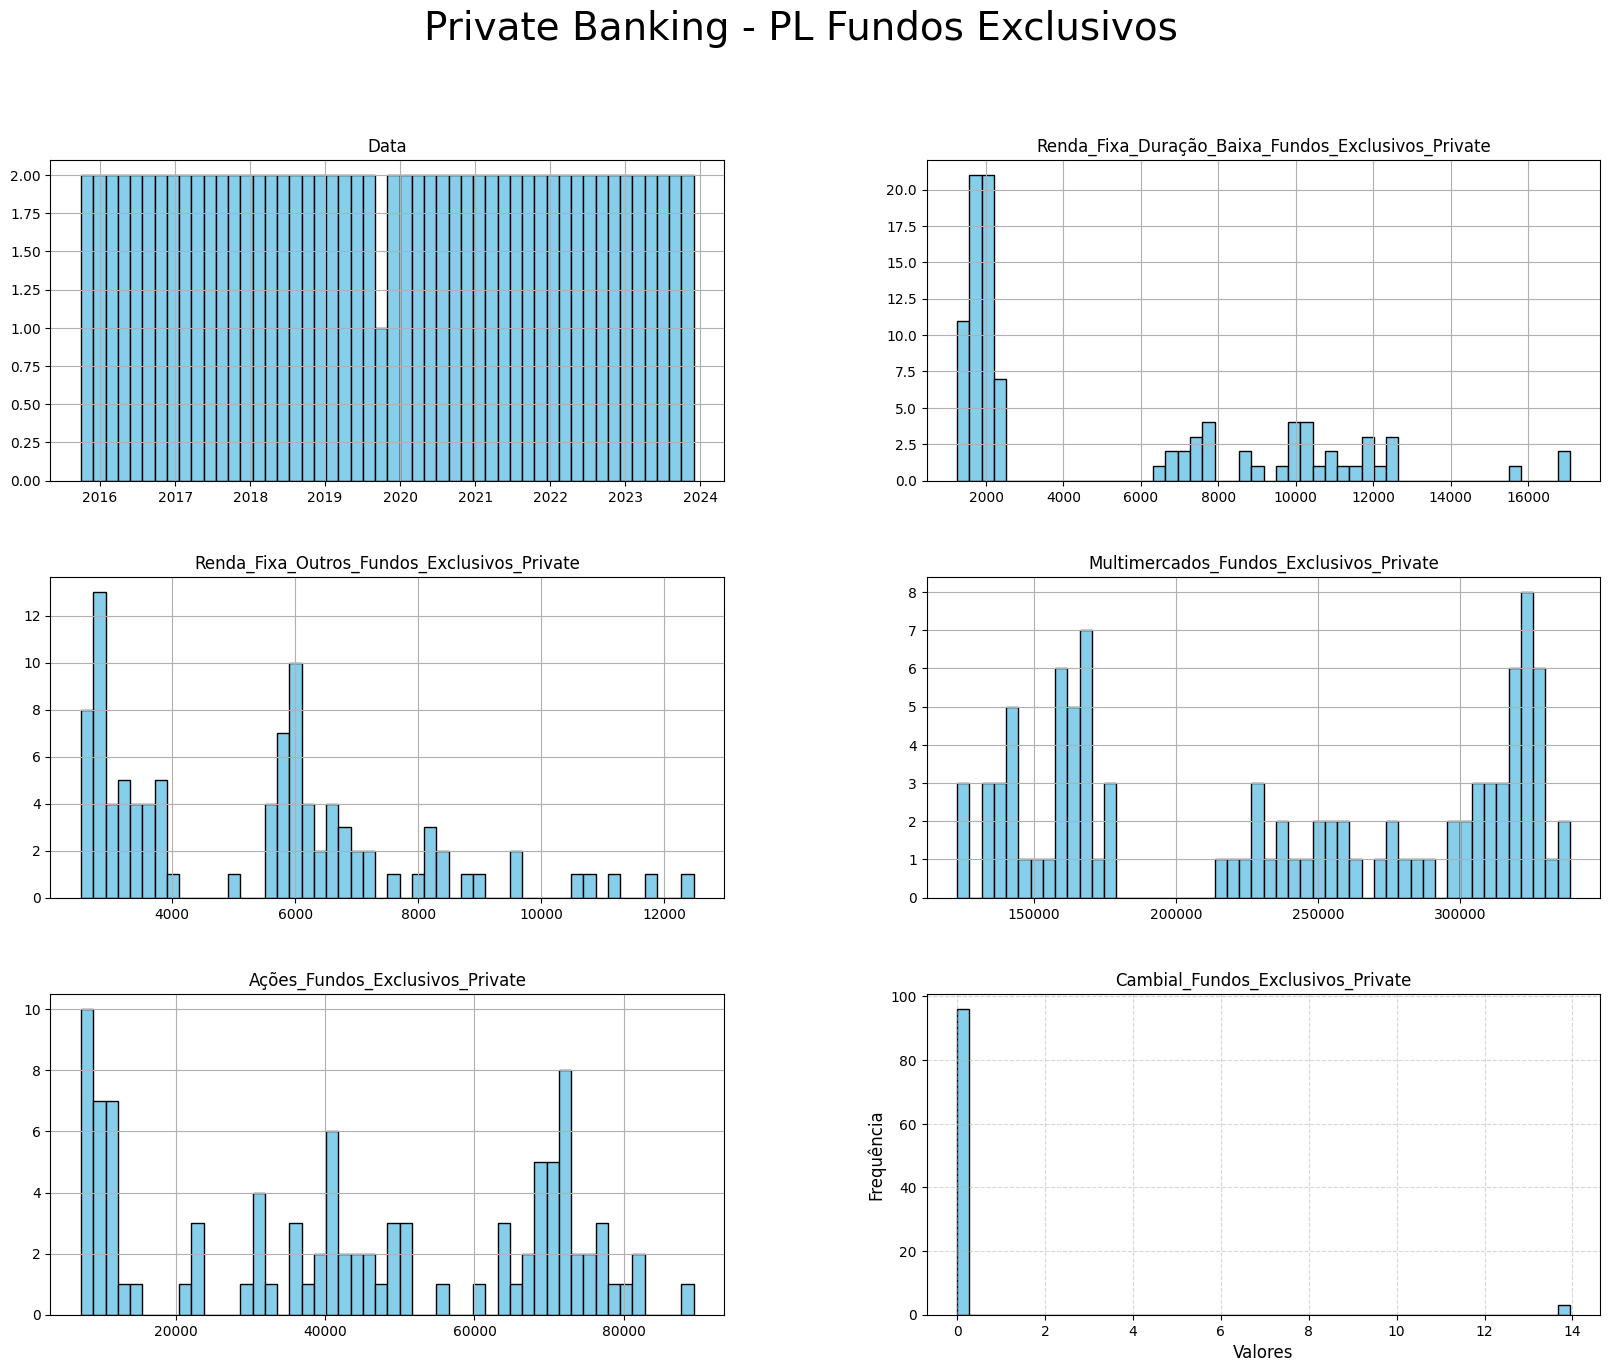

In [23]:
#Histograma dos dados da planilha "Fundos_Exclusivos_Dados_Fundos_Private"

Fundos_Exclusivos_Dados_Fundos_Private.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Private Banking - PL Fundos Exclusivos', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Volume Private em Fundos Estruturados**

A tabela *Fundos_Estruturados_Dados_Fundos_Private* agrega o Patrimônio Líquido Total vinculado aos fundos estruturados no mercado de Private Banking brasileiro.

Os dados da planilha estão no formato (R$ milhões).

**FIP_Fundos_Estruturados_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento estruturados da classe Fundo de Investimento em Participações (FIP).

**FIDC_Fundos_Estruturados_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento estruturados da classe Fundo de Investimento em Direitos Creditórios (FIDC).

**FII_Fundos_Estruturados_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento estruturados da classe Fundo de Investimento Imobiliário (FII).

**Outros_Fundos_Estruturados_Private** - Se refere ao Patrimônio Líquido total de fundos de investimento estruturados das demais classes.

In [ ]:
#Volume Private em Fundos Estruturados - Head

Fundos_Estruturados_Dados_Fundos_Private.head()


,Data,FIP_Fundos_Estruturados_Private,FIDC_Fundos_Estruturados_Private,FII_Fundos_Estruturados_Private,Outros_Fundos_Estruturados_Private
0,2023-12-01,19251.118469,4839.697341,15953.707545,489.962291
1,2023-11-01,19776.608023,4200.365133,15814.111130,472.931469
2,2023-10-01,19319.586973,4219.003714,15925.252225,451.191518
3,2023-09-01,19406.783699,3886.553279,16272.562621,450.602202
4,2023-08-01,19385.770586,3952.944412,16051.458601,472.599814


In [ ]:
#Volume Private em Fundos Estruturados - Info

Fundos_Estruturados_Dados_Fundos_Private.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Data                                99 non-null     datetime64[ns]
 1   FIP_Fundos_Estruturados_Private     99 non-null     float64       
 2   FIDC_Fundos_Estruturados_Private    99 non-null     float64       
 3   FII_Fundos_Estruturados_Private     99 non-null     float64       
 4   Outros_Fundos_Estruturados_Private  99 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.0 KB


In [ ]:
#Volume Private em Fundos Estruturados - Describe

Fundos_Estruturados_Dados_Fundos_Private.describe()

,FIP_Fundos_Estruturados_Private,FIDC_Fundos_Estruturados_Private,FII_Fundos_Estruturados_Private,Outros_Fundos_Estruturados_Private
count,99.000000,99.000000,99.000000,99.000000
mean,17194.378774,2765.668675,13507.232621,328.299941
std,6345.724725,1055.716734,2637.536978,156.217907
min,9900.083587,981.440667,7805.680608,49.967190
25%,12295.909085,1694.039525,11714.957658,232.022645
50%,15228.294525,3021.743110,14638.819985,364.662248
75%,20154.912860,3697.339750,15651.537065,452.702860
max,33439.946504,4839.697341,18072.859882,620.528771


In [ ]:
#Volume Private em Fundos Estruturados - Checagem de NA

Fundos_Estruturados_Dados_Fundos_Private.isnull().sum()

Data                                  0
FIP_Fundos_Estruturados_Private       0
FIDC_Fundos_Estruturados_Private      0
FII_Fundos_Estruturados_Private       0
Outros_Fundos_Estruturados_Private    0
dtype: int64

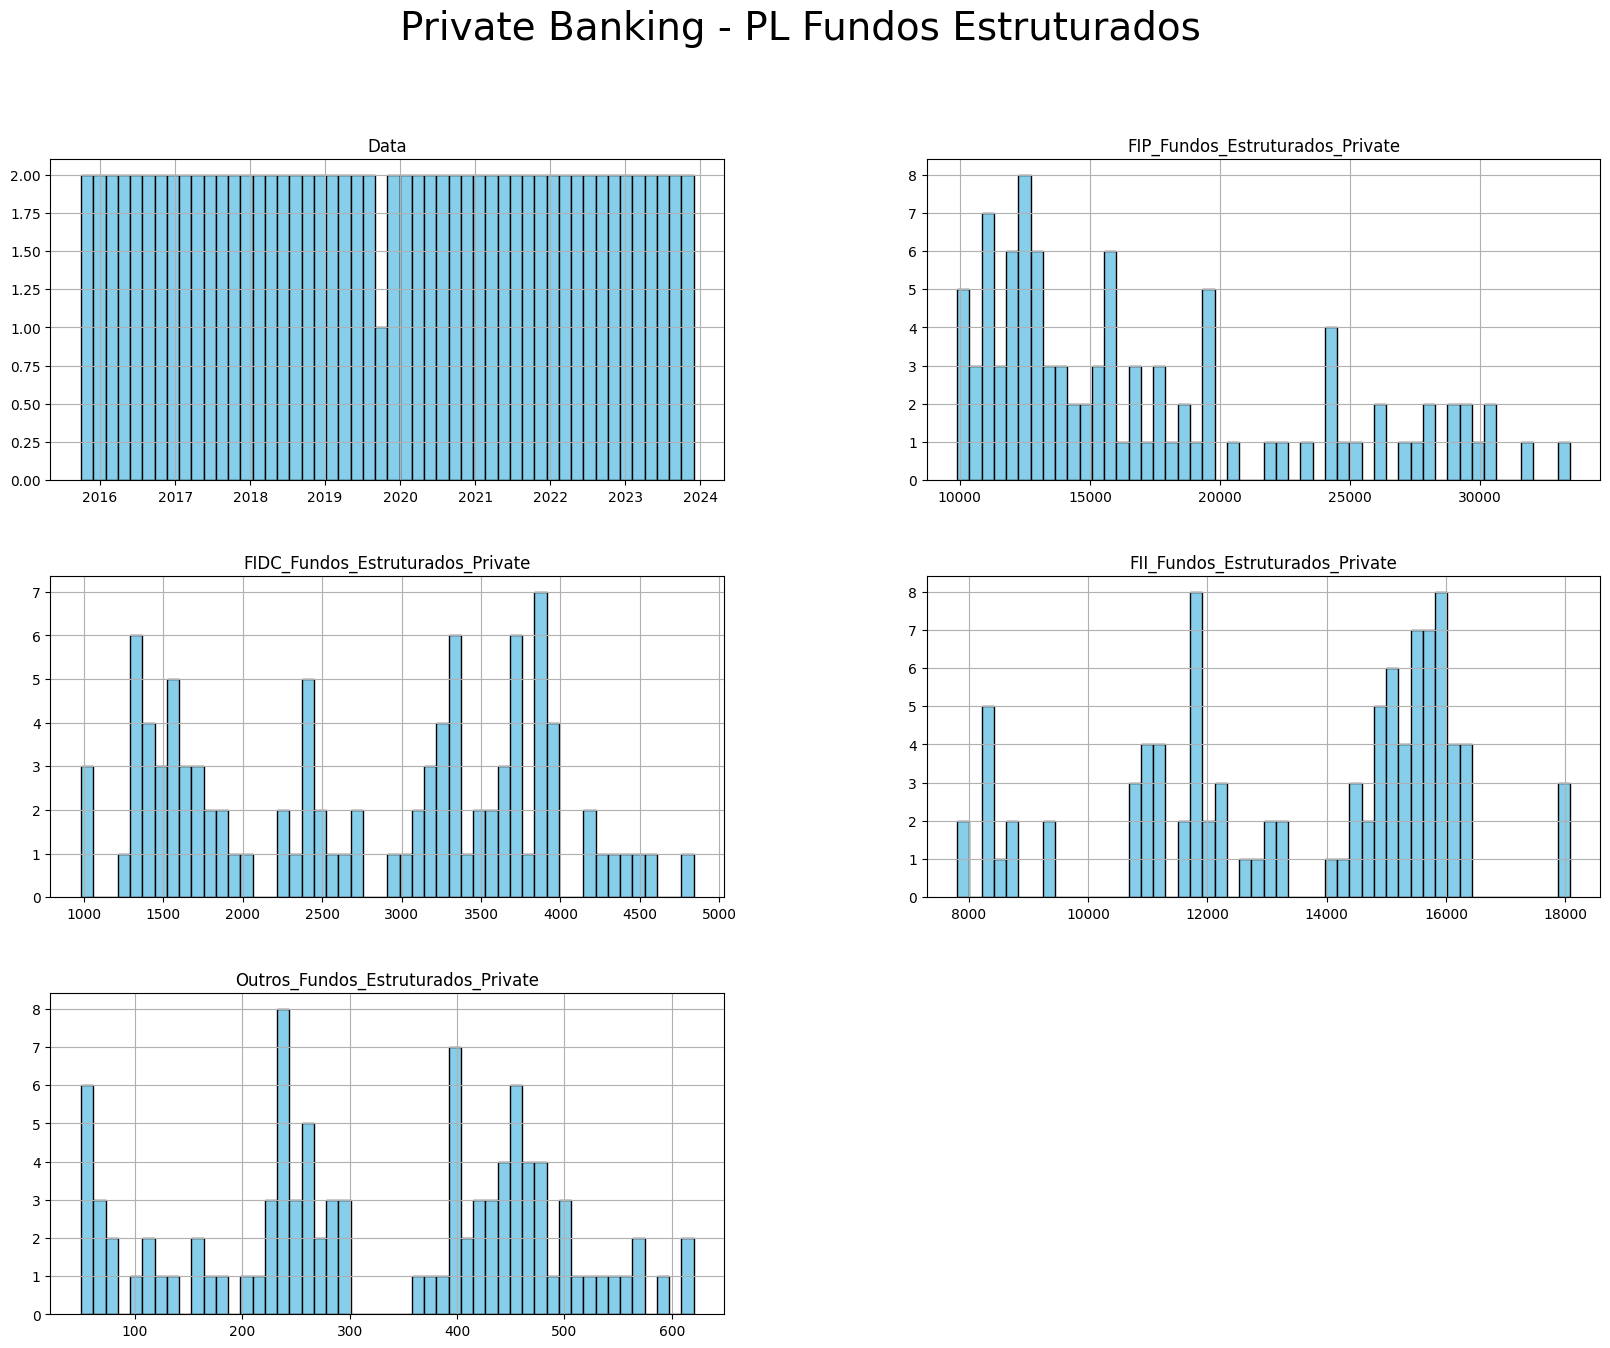

In [22]:
#Histograma dos dados da planilha "Fundos_Estruturados_Dados_Fundos_Private"

Fundos_Estruturados_Dados_Fundos_Private.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Private Banking - PL Fundos Estruturados', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Private - Volume Financeiro por Região***

A tabela *Volume_Financeiro_por_regiao_Dados_Geograficos_Private* segmenta o volume financeiro total do Private Banking em regiões.

É importante salientar que, ao contrário dos dados apresentados anteriormente, a segmentação se dá pelo critério de volume financeiro total e não pelo Patrimônio Líquido em Fundos de Investimento.

Os dados da planilha estão no formato (R$ milhões).

**Volume_Financeiro_Private_São_Paulo_Total** - Volume financeiro total de clientes Private do estado de São Paulo. Se refere a soma do volume financeiro da Grande São Paulo e da região de São Paulo Interior.

**Volume_Financeiro_Private_Grande_São_Paulo** - Volume Financeiro total de clientes Private da Região da Grande São Paulo.

**Volume_Financeiro_Private_São_Paulo_Interior** - Volume Financeiro total de clientes Private da Região de São Paulo Interior.

**Volume_Financeiro_Private_Rio_de_Janeiro** - Volume Financeiro total de clientes Private do estado do Rio de Janeiro.

**Volume_Financeiro_Private_Minas_Gerais_e_Espírito_Santo** - Soma do Volume Financeiro total de clientes Private dos estados de Minas Gerais e Espírito Santo.

**Volume_Financeiro_Private_Sul** - Volume Financeiro total de clientes Private da Região Sul.

**Volume_Financeiro_Private_Centro_Oeste** - Volume Financeiro total de clientes Private da Região Centro-Oeste.

**Volume_Financeiro_Private_Nordeste** - Volume Financeiro total de clientes Private da Região Nordeste.

**Volume_Financeiro_Private_Norte** - Volume Financeiro total de clientes Private da Região Norte.

**Volume_Financeiro_Private_Minas_Gerais** - Volume Financeiro total de clientes Private do estado de Minas Gerais.

**Volume_Financeiro_Private_Espírito_Santo** - Volume Financeiro total de clientes Private do estado do Espírito Santo.

**Volume_Financeiro_Private_Compilado_Minas_Gerais_e_Espírito_Santo** - Volume Financeiro total de clientes Private dos estados de Minas Gerais e Espírito Santo.

*Os dados referentes aos estados de Minas Gerais e Espírito Santo só passaram a ser divulgados separadamente a partir de dezembro de 2019.*

In [ ]:
#Volume Financeiro Private por Região - Head

Volume_Financeiro_por_regiao_Dados_Geograficos_Private.head()


,Data,Volume_Financeiro_Private_São_Paulo_Total,Volume_Financeiro_Private_Grande_São_Paulo,Volume_Financeiro_Private_São_Paulo_Interior,Volume_Financeiro_Private_Rio_de_Janeiro,Volume_Financeiro_Private_Minas_Gerais_e_Espírito_Santo,Volume_Financeiro_Private_Sul,Volume_Financeiro_Private_Centro_Oeste,Volume_Financeiro_Private_Nordeste,Volume_Financeiro_Private_Norte,Volume_Financeiro_Private_Minas_Gerais,Volume_Financeiro_Private_Espírito_Santo,Volume_Financeiro_Private_Compilado_ Minas_ Gerais_e_ Espírito_Santo
0,2023-12-01,1.205448e+06,994044.096030,211403.438010,247797.628982,NaN,339376.804873,64702.073507,130785.172321,15630.852599,97505.735502,15816.665663,113322.401165
1,2023-11-01,1.177853e+06,973118.157221,204734.535584,241065.180016,NaN,323315.745854,64519.766367,125342.211431,14978.159450,94442.309587,15193.344755,109635.654343
2,2023-10-01,1.132771e+06,937398.560726,195372.522796,232595.236457,NaN,317457.349317,63326.612359,118949.663156,15173.621104,84478.248957,14700.206958,99178.455916
3,2023-09-01,1.140819e+06,940353.152361,200466.219386,238952.979589,NaN,328528.012007,64200.676442,125725.833903,14504.865583,92196.950047,14542.388752,106739.338800
4,2023-08-01,1.135845e+06,935641.729163,200203.648401,239775.141272,NaN,323029.705423,62667.294404,111521.229304,14338.624447,92223.879525,14514.996705,106738.876230


In [ ]:
#Volume Financeiro Private por Região - Info

Volume_Financeiro_por_regiao_Dados_Geograficos_Private.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   Data                                                                  99 non-null     datetime64[ns]
 1   Volume_Financeiro_Private_São_Paulo_Total                             99 non-null     float64       
 2   Volume_Financeiro_Private_Grande_São_Paulo                            99 non-null     float64       
 3   Volume_Financeiro_Private_São_Paulo_Interior                          99 non-null     float64       
 4   Volume_Financeiro_Private_Rio_de_Janeiro                              99 non-null     float64       
 5   Volume_Financeiro_Private_Minas_Gerais_e_Espírito_Santo               50 non-null     float64       
 6   Volume_Financeiro_Private_Sul               

In [ ]:
#Volume Financeiro Private por Região - Describe

Volume_Financeiro_por_regiao_Dados_Geograficos_Private.describe()

,Volume_Financeiro_Private_São_Paulo_Total,Volume_Financeiro_Private_Grande_São_Paulo,Volume_Financeiro_Private_São_Paulo_Interior,Volume_Financeiro_Private_Rio_de_Janeiro,Volume_Financeiro_Private_Minas_Gerais_e_Espírito_Santo,Volume_Financeiro_Private_Sul,Volume_Financeiro_Private_Centro_Oeste,Volume_Financeiro_Private_Nordeste,Volume_Financeiro_Private_Norte,Volume_Financeiro_Private_Minas_Gerais,Volume_Financeiro_Private_Espírito_Santo,Volume_Financeiro_Private_Compilado_ Minas_ Gerais_e_ Espírito_Santo
count,9.900000e+01,99.000000,99.000000,99.000000,50.000000,99.000000,99.000000,99.000000,99.000000,49.000000,49.000000,99.000000
mean,7.631244e+05,640442.459547,122681.890728,178707.824035,56485.991245,194667.238227,35928.879950,70769.583675,8307.203277,82056.750056,11000.567511,74586.950738
std,2.520291e+05,200583.129907,53217.593602,40149.701754,10932.418705,80048.313152,13374.567070,23722.953769,3086.546740,8193.902880,2421.938968,21239.424343
min,3.969657e+05,337441.931200,59523.797586,115208.975824,37943.569870,90532.419613,18029.591781,38705.957917,3943.850798,63913.659934,7682.057801,37943.569870
25%,5.419503e+05,465266.041551,76836.185851,143951.440314,47735.348328,128030.025012,25920.794175,52704.344353,5740.000656,76877.351851,8876.015453,57824.942272
50%,7.144668e+05,614755.685905,99699.319510,174602.297839,57824.942272,166847.936615,32530.076903,61942.646868,7759.277935,84052.910622,11423.016245,73848.132198
75%,1.038228e+06,853485.581453,183795.528545,219613.064181,63901.406950,267881.382732,42608.898539,90157.429654,10530.563584,88451.949471,13144.763087,94706.090302
max,1.205448e+06,994044.096030,211403.438010,247797.628982,76347.199754,339376.804873,64702.073507,130785.172321,15630.852599,97505.735502,15816.665663,113322.401165


In [ ]:
#Volume Financeiro Private por Região - Checagem de NA

Volume_Financeiro_por_regiao_Dados_Geograficos_Private.isnull().sum()

Data                                                                     0
Volume_Financeiro_Private_São_Paulo_Total                                0
Volume_Financeiro_Private_Grande_São_Paulo                               0
Volume_Financeiro_Private_São_Paulo_Interior                             0
Volume_Financeiro_Private_Rio_de_Janeiro                                 0
Volume_Financeiro_Private_Minas_Gerais_e_Espírito_Santo                 49
Volume_Financeiro_Private_Sul                                            0
Volume_Financeiro_Private_Centro_Oeste                                   0
Volume_Financeiro_Private_Nordeste                                       0
Volume_Financeiro_Private_Norte                                          0
Volume_Financeiro_Private_Minas_Gerais                                  50
Volume_Financeiro_Private_Espírito_Santo                                50
Volume_Financeiro_Private_Compilado_ Minas_ Gerais_e_ Espírito_Santo     0
dtype: int64

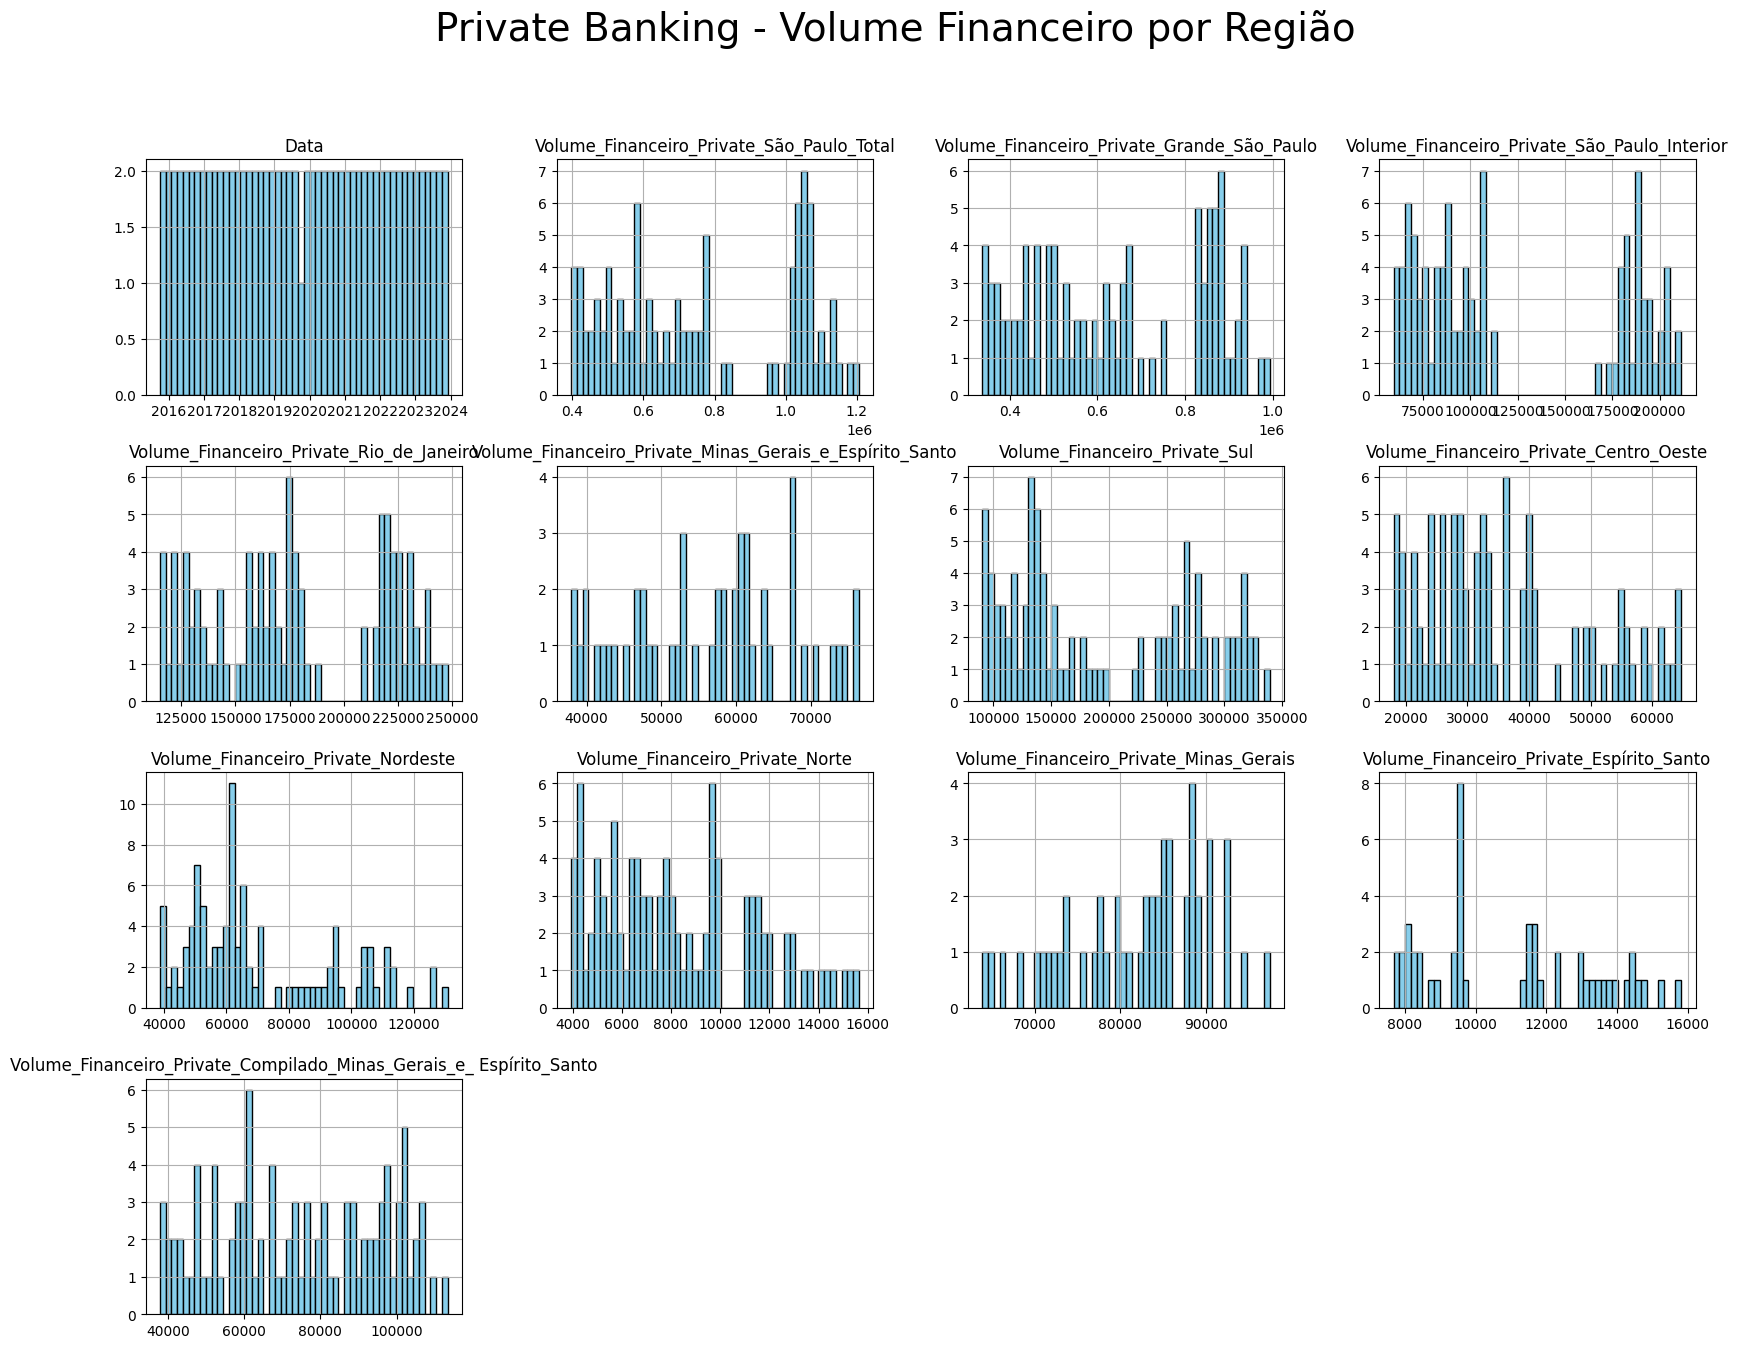

In [21]:
#Histograma dos dados da planilha "Volume_Financeiro_por_regiao_Dados_Geograficos_Private"

Volume_Financeiro_por_regiao_Dados_Geograficos_Private.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Private Banking - Volume Financeiro por Região', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Private - Grupos Econômicos por Região**

A tabela *Grupos_Economicos_por_regiao_Dados_Geograficos_Private* segmenta o número de grupos econômicos de clientes do segmento de Private Banking em regiões.

**Grupos_Econômicos_Private_São_Paulo_total** - Número de grupos econômicos do segmento de Private Banking do estado de São Paulo. Se refere a soma de grupos econômicos da Grande São Paulo e da região de São Paulo Interior.

**Grupos_Econômicos_Private_Grande_São_Paulo** - Número de grupos econômicos do segmento de Private Banking da Região da Grande São Paulo.

**Grupos_Econômicos_Private_São_Paulo_Interior** - Número de grupos econômicos do segmento de Private Banking da Região de São Paulo Interior.

**Grupos_Econômicos_Private_Rio_de_Janeiro** - Número de grupos econômicos do segmento de Private Banking do estado do Rio de Janeiro.

**Grupos_Econômicos_Private_Minas_Gerais_e_Espírito_Santo** - Número de grupos econômicos do segmento de Private Banking do estado de Minas Gerais e do estado do Espírito Santo.

**Grupos_Econômicos_Private_Sul** - Número de grupos econômicos do segmento de Private Banking da Região Sul.

**Grupos_Econômicos_Private_Centro_Oeste** - Número de grupos econômicos do segmento de Private Banking da Região Centro-Oeste.

**Grupos_Econômicos_Private_Nordeste** - Número de grupos econômicos do segmento de Private Banking da Região Nordeste.

**Grupos_Econômicos_Private_Norte** - Número de grupos econômicos do segmento de Private Banking da Região Norte.

**Grupos_Econômicos_Private_Minas_Gerais** - Número de grupos econômicos do segmento de Private Banking do estado de Minas Gerais.

**Grupos_Econômicos_Private_Espírito_Santo** - Número de grupos econômicos do segmento de Private Banking do estado do Espírito Santo.

**Grupos_Econômicos_Private_Minas_Gerais_e_Espírito_Santo** - Número de grupos econômicos do segmento de Private Banking dos estados de Minas Gerais e Espírito Santo.



In [ ]:
#Grupos Econômicos Private por Região - Head

Grupos_Economicos_por_regiao_Dados_Geograficos_Private.head()

,Data,Grupos_Econômicos_Private_São_Paulo_total,Grupos_Econômicos_Private_Grande_São_Paulo,Grupos_Econômicos_Private_São Paulo Interior,Grupos_Econômicos_Private_Rio de Janeiro,Grupos_Econômicos_Private_Minas_Gerais_e_Espírito Santo,Grupos_Econômicos_Private_Sul,Grupos_Econômicos_Private_Centro_Oeste,Grupos_Econômicos_Private_Nordeste,Grupos_Econômicos_Private_Norte,Grupos_Econômicos_Private_Minas_Gerais,Grupos_Econômicos_Private_Espírito Santo,Grupos_Econômicos_Private_Minas_Gerais_e_ Espírito_Santo
0,2023-12-01,32639,24823,7816,9496,NaN,10122,5110,6026,1094,5312.0,977.0,6289
1,2023-11-01,33100,25176,7924,9752,NaN,10356,5139,6077,1070,5337.0,974.0,6311
2,2023-10-01,32383,24659,7724,9681,NaN,10176,5092,5943,1056,5295.0,954.0,6249
3,2023-09-01,32247,24554,7693,9701,NaN,10052,5070,5911,1037,5264.0,935.0,6199
4,2023-08-01,33298,25377,7921,10180,NaN,10355,5248,6336,1196,5434.0,980.0,6414


In [ ]:
#Grupos Econômicos Private por Região - Info

Grupos_Economicos_por_regiao_Dados_Geograficos_Private.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Data                                                      99 non-null     datetime64[ns]
 1   Grupos_Econômicos_Private_São_Paulo_total                 99 non-null     int64         
 2   Grupos_Econômicos_Private_Grande_São_Paulo                99 non-null     int64         
 3   Grupos_Econômicos_Private_São Paulo Interior              99 non-null     int64         
 4   Grupos_Econômicos_Private_Rio de Janeiro                  99 non-null     int64         
 5   Grupos_Econômicos_Private_Minas_Gerais_e_Espírito Santo   50 non-null     float64       
 6   Grupos_Econômicos_Private_Sul                             99 non-null     int64         
 7   Grupos_Econômicos_Private_Centro_Oeste        

In [ ]:
#Grupos Econômicos Private por Região - Describe

Grupos_Economicos_por_regiao_Dados_Geograficos_Private.describe()

,Grupos_Econômicos_Private_São_Paulo_total,Grupos_Econômicos_Private_Grande_São_Paulo,Grupos_Econômicos_Private_São Paulo Interior,Grupos_Econômicos_Private_Rio de Janeiro,Grupos_Econômicos_Private_Minas_Gerais_e_Espírito Santo,Grupos_Econômicos_Private_Sul,Grupos_Econômicos_Private_Centro_Oeste,Grupos_Econômicos_Private_Nordeste,Grupos_Econômicos_Private_Norte,Grupos_Econômicos_Private_Minas_Gerais,Grupos_Econômicos_Private_Espírito Santo,Grupos_Econômicos_Private_Minas_Gerais_e_ Espírito_Santo
count,99.000000,99.000000,99.000000,99.000000,50.00000,99.000000,99.000000,99.000000,99.000000,49.000000,49.000000,99.000000
mean,29234.626263,23036.464646,6198.161616,9347.777778,4450.76000,7382.626263,3543.505051,4282.494949,651.505051,4669.734694,742.408163,4926.595960
std,1850.008702,1334.789040,645.512891,523.856881,199.34736,1228.892388,723.731069,755.999317,185.901245,506.191819,149.614354,678.771699
min,26364.000000,20687.000000,5582.000000,8390.000000,4067.00000,5891.000000,2696.000000,3499.000000,483.000000,3956.000000,570.000000,4067.000000
25%,28211.000000,22425.500000,5757.000000,8983.000000,4287.00000,6702.000000,3139.000000,3886.000000,518.500000,4229.000000,604.000000,4538.500000
50%,28655.000000,22815.000000,5890.000000,9264.000000,4538.50000,6934.000000,3299.000000,3933.000000,580.000000,4892.000000,802.000000,4632.000000
75%,30628.000000,24055.000000,6502.000000,9729.500000,4604.75000,8117.500000,3807.500000,4710.000000,747.500000,5100.000000,851.000000,5447.000000
max,33298.000000,26293.000000,7924.000000,10536.000000,4760.00000,10356.000000,5248.000000,6336.000000,1196.000000,5453.000000,980.000000,6427.000000


In [ ]:
#Grupos Econômicos Private por Região - Checagem de NA

Grupos_Economicos_por_regiao_Dados_Geograficos_Private.isnull().sum()

Data                                                         0
Grupos_Econômicos_Private_São_Paulo_total                    0
Grupos_Econômicos_Private_Grande_São_Paulo                   0
Grupos_Econômicos_Private_São Paulo Interior                 0
Grupos_Econômicos_Private_Rio de Janeiro                     0
Grupos_Econômicos_Private_Minas_Gerais_e_Espírito Santo     49
Grupos_Econômicos_Private_Sul                                0
Grupos_Econômicos_Private_Centro_Oeste                       0
Grupos_Econômicos_Private_Nordeste                           0
Grupos_Econômicos_Private_Norte                              0
Grupos_Econômicos_Private_Minas_Gerais                      50
Grupos_Econômicos_Private_Espírito Santo                    50
Grupos_Econômicos_Private_Minas_Gerais_e_ Espírito_Santo     0
dtype: int64

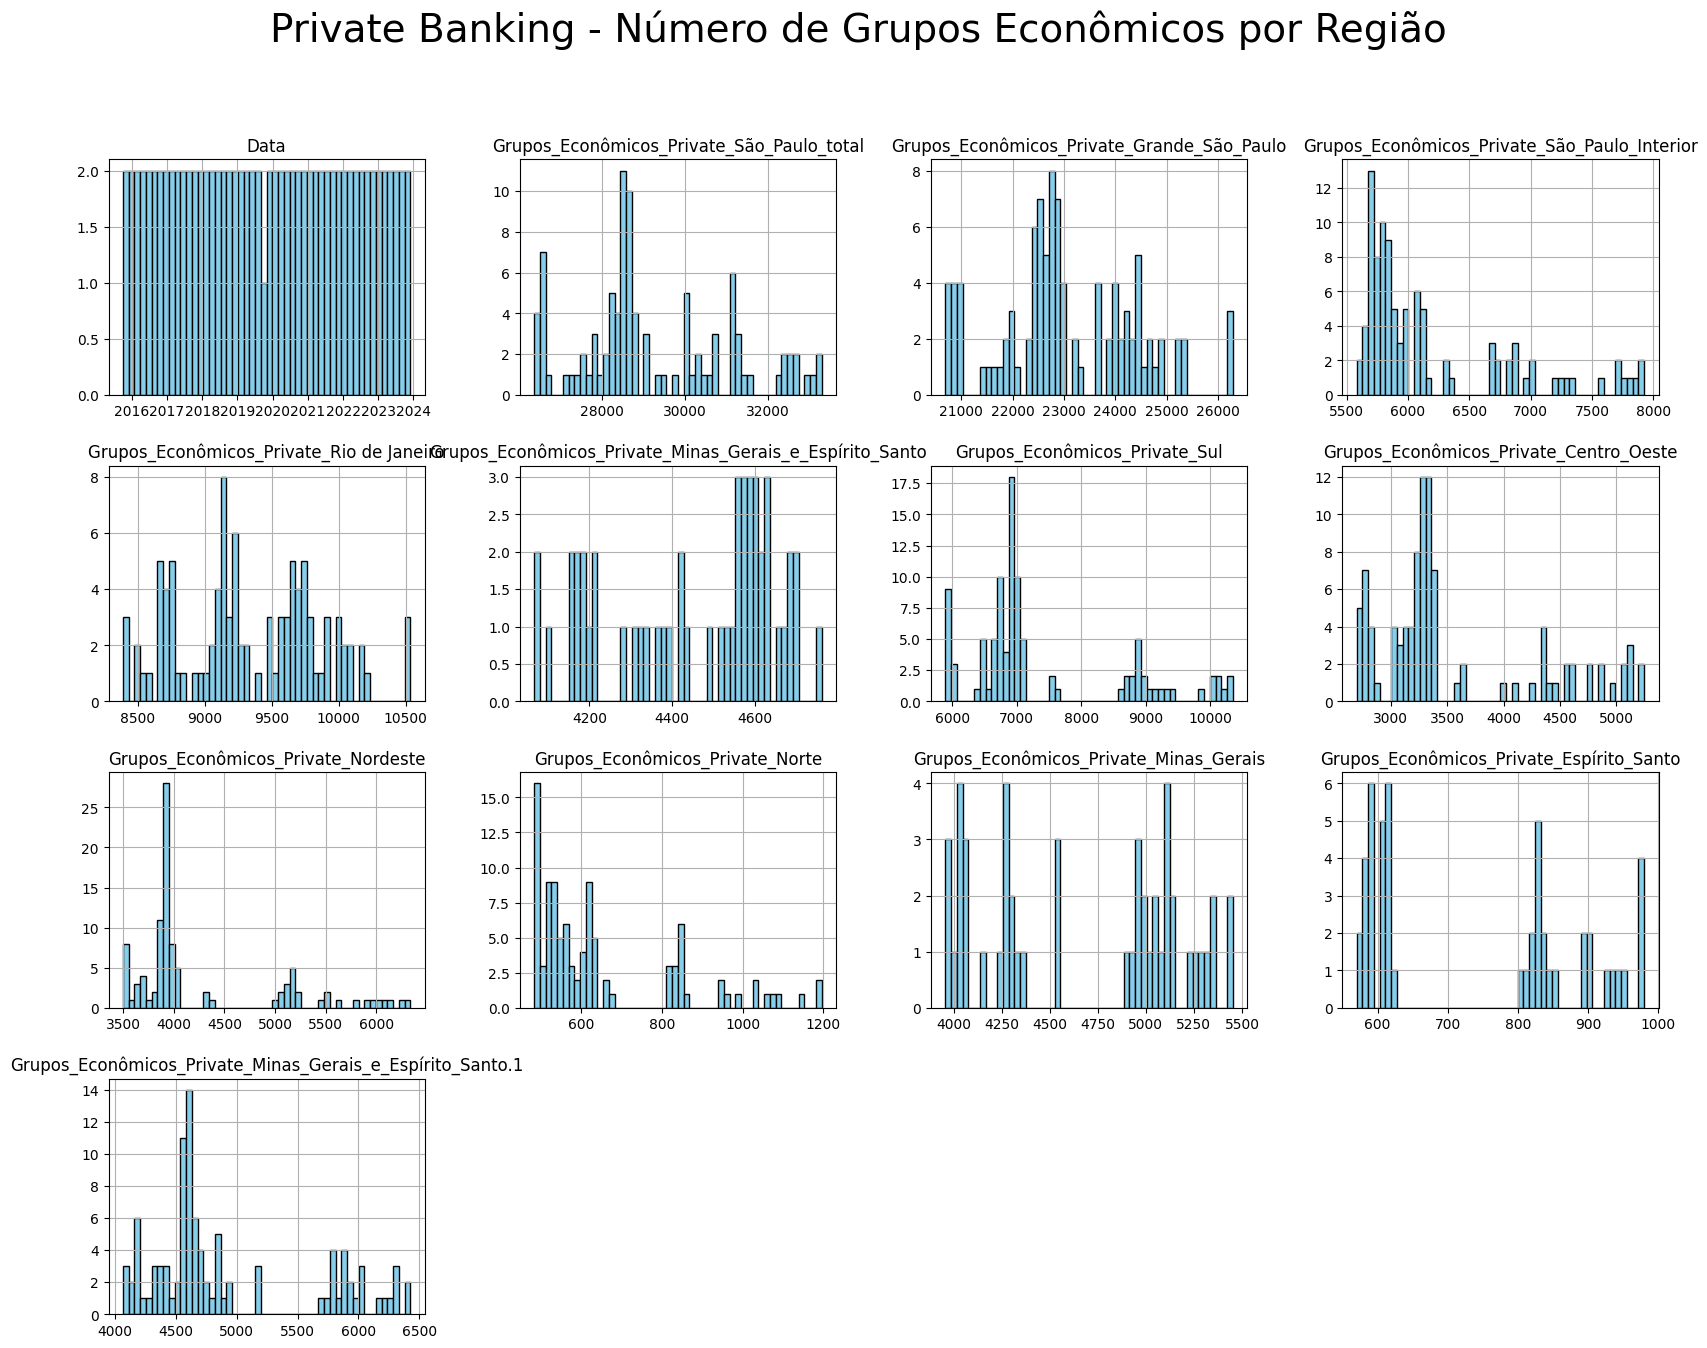

In [20]:
#Histograma dos dados da planilha "Grupos_Economicos_por_regiao_Dados_Geograficos_Private"

Grupos_Economicos_por_regiao_Dados_Geograficos_Private.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Private Banking - Número de Grupos Econômicos por Região', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Private - Contas por Região**

A tabela Contas_por_regiao_Dados_Geograficos_Private segmenta o número de contas de clientes do segmento de Private Banking em regiões.

**Contas_Private_São_Paulo_total** - Número de contas do segmento de Private Banking do estado de São Paulo. Se refere a soma de contas da Grande São Paulo e da região de São Paulo Interior.

**Contas_Private_Grande_São_Paulo** - Número de contas do segmento de Private Banking da Região da Grande São Paulo.

**Contas_Private_São_Paulo_Interior** - Número de contas do segmento de Private Banking da Região de São Paulo Interior.

**Contas_Private_Rio_de_Janeiro** - Número de contas do segmento de Private Banking do estado do Rio de Janeiro.

**Contas_Private_Minas_Gerais_e_Espírito_Santo** - Número de contas do segmento de Private Banking dos estados de Minas Gerais e Espírito Santo.

**Contas_Private_Sul** - Número de contas do segmento de Private Banking da Região Sul.

**Contas_Private_Centro_Oeste** - Número de contas do segmento de Private Banking da Região Centro-Oeste.

**Contas_Private_Nordeste** - Número de contas do segmento de Private Banking da Região Nordeste.

**Contas_Private_Norte** - Número de contas do segmento de Private Banking da Região Norte.

**Contas_Private_Minas_Gerais** - Número de contas do segmento de Private Banking do estado de Minas Gerais.

**Contas_Private_Espírito_Santo** - Número de contas do segmento de Private Banking do estado do Espírito Santo.

**Contas_Private_Compilado_Minas_Gerais_e_Espírito_Santo** - Número de contas do segmento de Private Banking dos estados de Minas Gerais e Espírito Santo.



In [ ]:
#Contas Private por Região - Head

Contas_por_regiao_Dados_Geograficos_Private.head()

,Data,Contas_Private_São_Paulo_total,Contas_Private_Grande_São_Paulo,Contas_Private_São_Paulo_Interior,Contas_Private_Rio_de_Janeiro,Contas_Private_Minas Gerais_e_Espírito_Santo,Contas_Private_Sul,Contas_Private_Centro_Oeste,Contas_Private_Nordeste,Contas_Private_Norte,Contas_Private_Minas_Gerais,Contas_Private_Espírito_Santo,Contas_Private_Compilado_Minas_Gerais_e_Espírito_Santo
0,2023-12-01,72173,54144,18029,20012,NaN,24203,11582,13293,2219,13032.0,2313.0,15345
1,2023-11-01,71434,53541,17893,20093,NaN,23960,11545,13194,2174,12898.0,2283.0,15181
2,2023-10-01,71572,53995,17577,20094,NaN,23833,11421,13076,2146,12961.0,2250.0,15211
3,2023-09-01,70293,52675,17618,19966,NaN,23557,11389,12976,2129,12742.0,2225.0,14967
4,2023-08-01,71039,53328,17711,20390,NaN,23722,11508,13343,2268,12805.0,2252.0,15057


In [ ]:
#Contas Private por Região - Info

Contas_por_regiao_Dados_Geograficos_Private.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Data                                                    99 non-null     datetime64[ns]
 1   Contas_Private_São_Paulo_total                          99 non-null     int64         
 2   Contas_Private_Grande_São_Paulo                         99 non-null     int64         
 3   Contas_Private_São_Paulo_Interior                       99 non-null     int64         
 4   Contas_Private_Rio_de_Janeiro                           99 non-null     int64         
 5   Contas_Private_Minas Gerais_e_Espírito_Santo            50 non-null     float64       
 6   Contas_Private_Sul                                      99 non-null     int64         
 7   Contas_Private_Centro_Oeste                             99 non-n

In [ ]:
#Contas Private por Região - Describe

Contas_por_regiao_Dados_Geograficos_Private.describe()

,Contas_Private_São_Paulo_total,Contas_Private_Grande_São_Paulo,Contas_Private_São_Paulo_Interior,Contas_Private_Rio_de_Janeiro,Contas_Private_Minas Gerais_e_Espírito_Santo,Contas_Private_Sul,Contas_Private_Centro_Oeste,Contas_Private_Nordeste,Contas_Private_Norte,Contas_Private_Minas_Gerais,Contas_Private_Espírito_Santo,Contas_Private_Compilado_Minas_Gerais_e_Espírito_Santo
count,99.000000,99.000000,99.000000,99.000000,50.000000,99.000000,99.000000,99.000000,99.000000,49.000000,49.000000,99.000000
mean,61796.646465,48002.292929,13794.353535,17981.848485,10119.200000,16752.929293,7644.494949,9402.262626,1259.575758,10878.693878,1744.877551,11358.737374
std,4193.989286,2619.456581,1665.230960,1185.853394,473.321697,3374.111412,1773.694181,1683.115088,409.870714,1440.120441,384.557843,1822.859928
min,56417.000000,44236.000000,12138.000000,16400.000000,9319.000000,12767.000000,5548.000000,7389.000000,821.000000,9130.000000,1334.000000,9319.000000
25%,58696.500000,45907.500000,12838.000000,17104.500000,9593.000000,14648.500000,6483.000000,8283.500000,960.000000,9422.000000,1359.000000,10203.000000
50%,60448.000000,47282.000000,13068.000000,17686.000000,10203.000000,15470.000000,7169.000000,8852.000000,1147.000000,11512.000000,1950.000000,10607.000000
75%,65071.000000,50284.500000,14443.000000,19123.000000,10556.500000,18587.000000,8349.000000,10295.500000,1493.500000,12069.000000,2083.000000,12411.000000
max,72173.000000,54144.000000,18029.000000,20793.000000,10825.000000,24203.000000,11582.000000,13343.000000,2268.000000,13032.000000,2313.000000,15345.000000


In [ ]:
#Contas Private por Região - Checagem de NA

Contas_por_regiao_Dados_Geograficos_Private.isnull().sum()

Data                                                       0
Contas_Private_São_Paulo_total                             0
Contas_Private_Grande_São_Paulo                            0
Contas_Private_São_Paulo_Interior                          0
Contas_Private_Rio_de_Janeiro                              0
Contas_Private_Minas Gerais_e_Espírito_Santo              49
Contas_Private_Sul                                         0
Contas_Private_Centro_Oeste                                0
Contas_Private_Nordeste                                    0
Contas_Private_Norte                                       0
Contas_Private_Minas_Gerais                               50
Contas_Private_Espírito_Santo                             50
Contas_Private_Compilado_Minas_Gerais_e_Espírito_Santo     0
dtype: int64

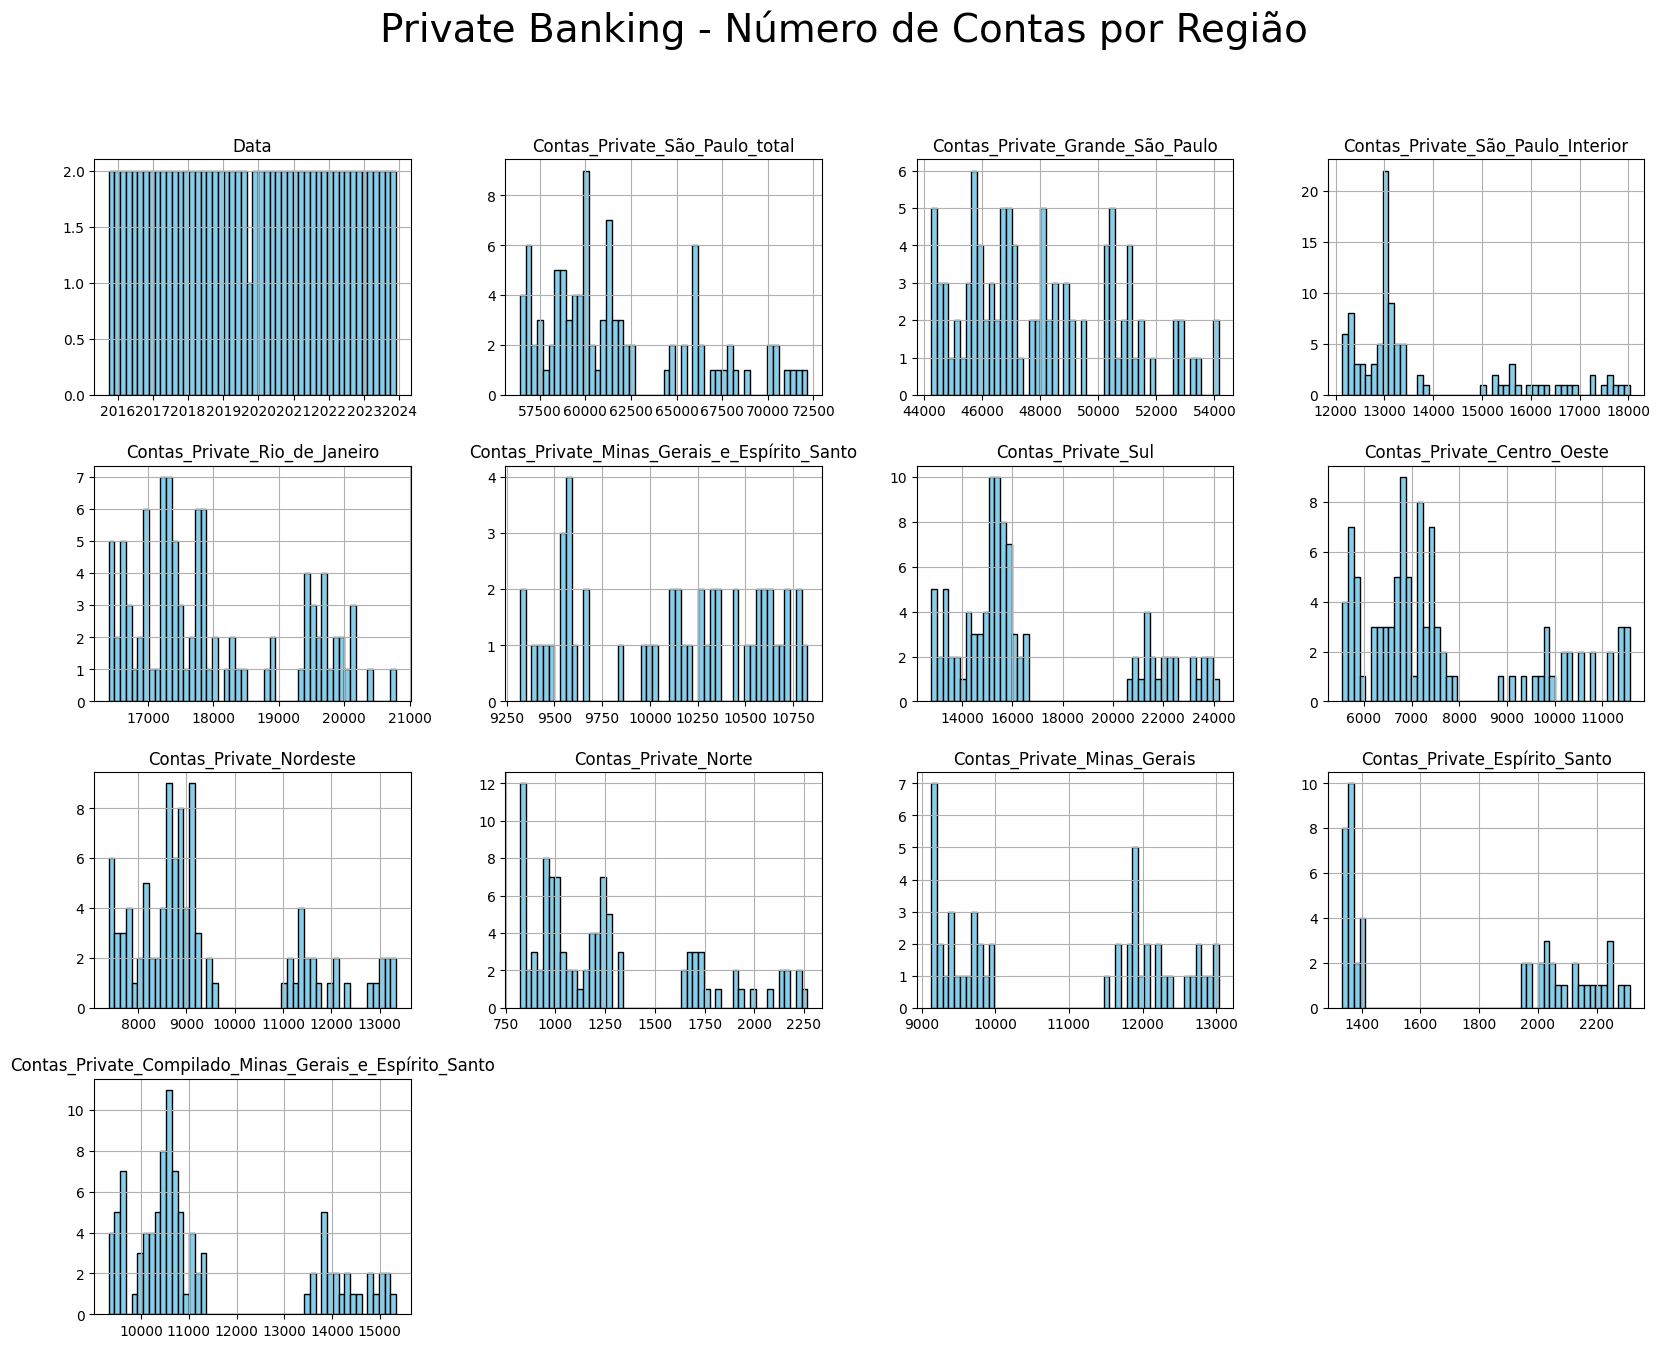

In [19]:
#Histograma dos dados da planilha "Contas_por_regiao_Dados_Geograficos_Private"

Contas_por_regiao_Dados_Geograficos_Private.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Private Banking - Número de Contas por Região', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Mercado Brasileiro de Fundos de Investimento - Totalizador**

A tabela *PL_Total_Dados_Mercado_Fundos* mostra o Patrimônio Líquido agregado da industria de fundos de investimento brasileira.

Os dados da planilha estão no formato (R$ milhões).

**Mercado_PL_Total** - Patrimônio Líquido total de toda indústria de fundos de investimento.

**Mercado_PL_ex_Previdência** - Patrimônio Líquido de toda indústria de fundos de investimento (exceto fundos de previdência).

In [ ]:
#Mercado Brasileiro de Fundos de Investimento - Head

PL_Total_Dados_Mercado_Fundos.head()

,Data,Mercado_PL_Total,Mercado_PL_ex_Previdência
0,2023-12-01,8.316206e+06,6.959952e+06
1,2023-11-01,8.278796e+06,6.944369e+06
2,2023-10-01,8.116029e+06,6.804148e+06
3,2023-09-01,8.102828e+06,6.799864e+06
4,2023-08-01,8.053592e+06,6.762775e+06


In [ ]:
#Mercado Brasileiro de Fundos de Investimento - Info

PL_Total_Dados_Mercado_Fundos.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Data                        97 non-null     datetime64[ns]
 1   Mercado_PL_Total            97 non-null     float64       
 2   Mercado_PL_ex_Previdência   97 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 KB


In [ ]:
#Mercado Brasileiro de Fundos de Investimento - Describe

PL_Total_Dados_Mercado_Fundos.describe()

,Mercado_PL_Total,Mercado_PL_ex_Previdência
count,9.700000e+01,9.700000e+01
mean,5.484147e+06,4.585357e+06
std,1.590354e+06,1.367828e+06
min,2.993403e+06,2.503156e+06
25%,4.151490e+06,3.417644e+06
50%,5.341138e+06,4.431610e+06
75%,6.922590e+06,5.877722e+06
max,8.316206e+06,6.959952e+06


In [ ]:
#Mercado Brasileiro de Fundos de Investimento - Checagem de NA

PL_Total_Dados_Mercado_Fundos.isnull().sum()

Data                          0
Mercado_PL_Total              0
Mercado_PL_ex_Previdência     0
dtype: int64

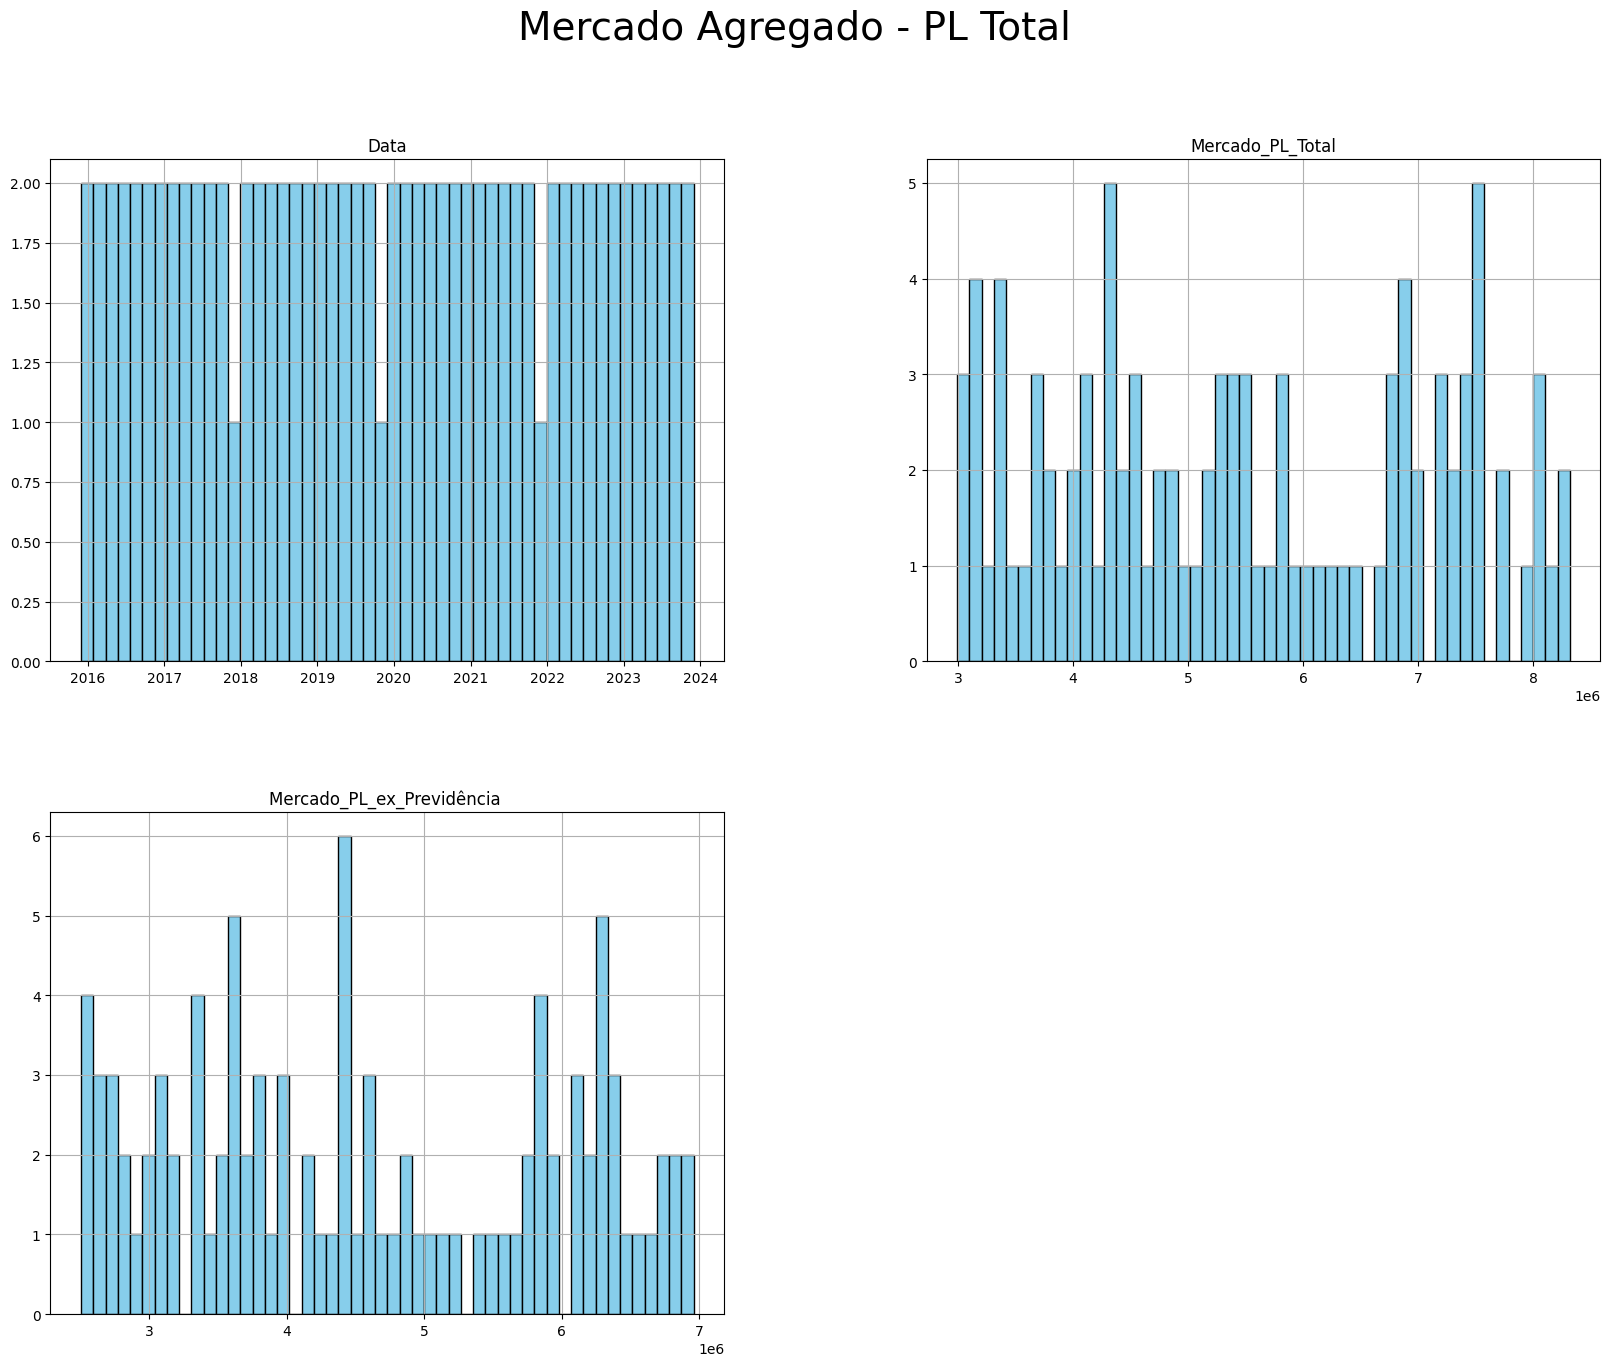

In [18]:
#Histograma dos dados da planilha "PL_Total_Dados_Mercado_Fundos"

PL_Total_Dados_Mercado_Fundos.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Mercado Agregado - PL Total ', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Mercado Brasileiro de Fundos de Investimento - Patrimônio Líquido por Classe de Fundo**

A tabela *PL_por_Classe_Dados_Mercado_Fundos* segmenta o Patrimônio Líquido do mercado brasileiro de fundos de investimento em suas diversas classes.

Os dados da planilha estão no formato (R$ milhões).

**Mercado_PL_Renda_Fixa** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, da classe de Renda Fixa.

**Mercado_PL_Ações** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, da classe de Ações.

**Mercado_PL_Multimercado** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, da classe de Multimercado.

**Mercado_PL_Cambial** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, da classe Cambial.

**Mercado_PL_Previdência** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, do tipo previdência.

**Mercado_PL_ETF** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, da classe Exchange Traded Fund (ETF).

**Mercado_PL_FIDC** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, da classe de Fundo de Investimento em Direitos Creditórios (FIDC).

**Mercado_PL_FIP** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, da classe de Fundo de Investimento em Participações (FIP).

**Mercado_PL_FII** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, da classe de Fundo de Investimento Imobiliário (FII).

**Mercado_PL_Off_shore** - Se refere ao Patrimônio Líquido total de fundos de investimento do mercado brasileiro, da classe de offshore.

In [ ]:
#Mercado Brasileiro de Fundos de Investimento (PL por Classe de Fundo) - Head

PL_por_Classe_Dados_Mercado_Fundos.head()

,Data,Mercado_PL_Renda_Fixa,Mercado_PL_Ações,Mercado_PL_Multimercado,Mercado_PL_Cambial,Mercado_PL_Previdência,Mercado_PL_ETF,Mercado_PL_FIDC,Mercado_PL_FIP,Mercado_PL_FII,Mercado_PL_Off_shore,Total
0,2023-12-01,3.140869e+06,601872.534002,1.686241e+06,5924.289777,1.356254e+06,44519.203924,426106.399884,722283.439367,287709.072368,44427.952035,8.316206e+06
1,2023-11-01,3.156636e+06,570097.483861,1.693573e+06,6242.126000,1.334427e+06,40957.369393,416087.426614,728639.402509,287709.072368,44427.952035,8.278796e+06
2,2023-10-01,3.092634e+06,514401.595623,1.697217e+06,6171.815557,1.311881e+06,36772.149144,403737.588023,732202.657822,278273.379839,42737.957503,8.116029e+06
3,2023-09-01,3.078811e+06,525522.441062,1.719885e+06,6535.924960,1.302964e+06,40130.603897,389537.349319,719219.937012,275880.922234,44340.782188,8.102828e+06
4,2023-08-01,3.047431e+06,527534.651278,1.724717e+06,6356.689262,1.290817e+06,40824.997177,388065.763792,708444.212990,273920.604039,45479.998432,8.053592e+06


In [ ]:
#Mercado Brasileiro de Fundos de Investimento (PL por Classe de Fundo) - Info

PL_por_Classe_Dados_Mercado_Fundos.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     97 non-null     datetime64[ns]
 1   Mercado_PL_Renda_Fixa    97 non-null     float64       
 2   Mercado_PL_Ações         97 non-null     float64       
 3   Mercado_PL_Multimercado  97 non-null     float64       
 4   Mercado_PL_Cambial       97 non-null     float64       
 5   Mercado_PL_Previdência   97 non-null     float64       
 6   Mercado_PL_ETF           97 non-null     float64       
 7   Mercado_PL_FIDC          97 non-null     float64       
 8   Mercado_PL_FIP           97 non-null     float64       
 9   Mercado_PL_FII           97 non-null     float64       
 10  Mercado_PL_Off_shore     97 non-null     float64       
 11  Total                    97 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memo

In [ ]:
#Mercado Brasileiro de Fundos de Investimento (PL por Classe de Fundo) - Describe

PL_por_Classe_Dados_Mercado_Fundos.describe()

,Mercado_PL_Renda_Fixa,Mercado_PL_Ações,Mercado_PL_Multimercado,Mercado_PL_Cambial,Mercado_PL_Previdência,Mercado_PL_ETF,Mercado_PL_FIDC,Mercado_PL_FIP,Mercado_PL_FII,Mercado_PL_Off_shore,Total
count,9.700000e+01,97.000000,9.700000e+01,97.000000,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01
mean,2.227734e+06,391401.975975,1.180854e+06,5651.398256,8.987895e+05,23008.941026,198408.531763,372253.674562,141557.595485,44486.464875,5.484147e+06
std,4.647390e+05,175346.333978,3.771454e+05,1738.511931,2.256218e+05,15314.875235,107211.277947,188798.733490,76906.474126,8937.847816,1.590354e+06
min,1.412369e+06,135181.648568,5.892046e+05,3079.759358,4.902468e+05,2723.941059,71584.899679,168348.943193,56865.390053,23605.318829,2.993403e+06
25%,1.928957e+06,228262.880384,8.474655e+05,3970.365860,7.338452e+05,6701.372124,102117.686007,214658.512968,65256.772081,40471.389493,4.151490e+06
50%,2.146823e+06,423002.019346,1.184657e+06,5982.927853,9.154306e+05,27843.436977,188128.494136,305093.230538,124827.250173,43427.693430,5.341138e+06
75%,2.585177e+06,526881.920064,1.560611e+06,7120.667438,1.044868e+06,36772.149144,286357.672921,559597.536111,214085.269869,49412.294798,6.922590e+06
max,3.156636e+06,702620.899341,1.724717e+06,9107.890717,1.356254e+06,48414.046123,426106.399884,732202.657822,287709.072368,63771.458764,8.316206e+06


In [ ]:
#Mercado Brasileiro de Fundos de Investimento (PL por Classe de Fundo) - Checagem de NA

PL_por_Classe_Dados_Mercado_Fundos.isnull().sum()

Data                       0
Mercado_PL_Renda_Fixa      0
Mercado_PL_Ações           0
Mercado_PL_Multimercado    0
Mercado_PL_Cambial         0
Mercado_PL_Previdência     0
Mercado_PL_ETF             0
Mercado_PL_FIDC            0
Mercado_PL_FIP             0
Mercado_PL_FII             0
Mercado_PL_Off_shore       0
Total                      0
dtype: int64

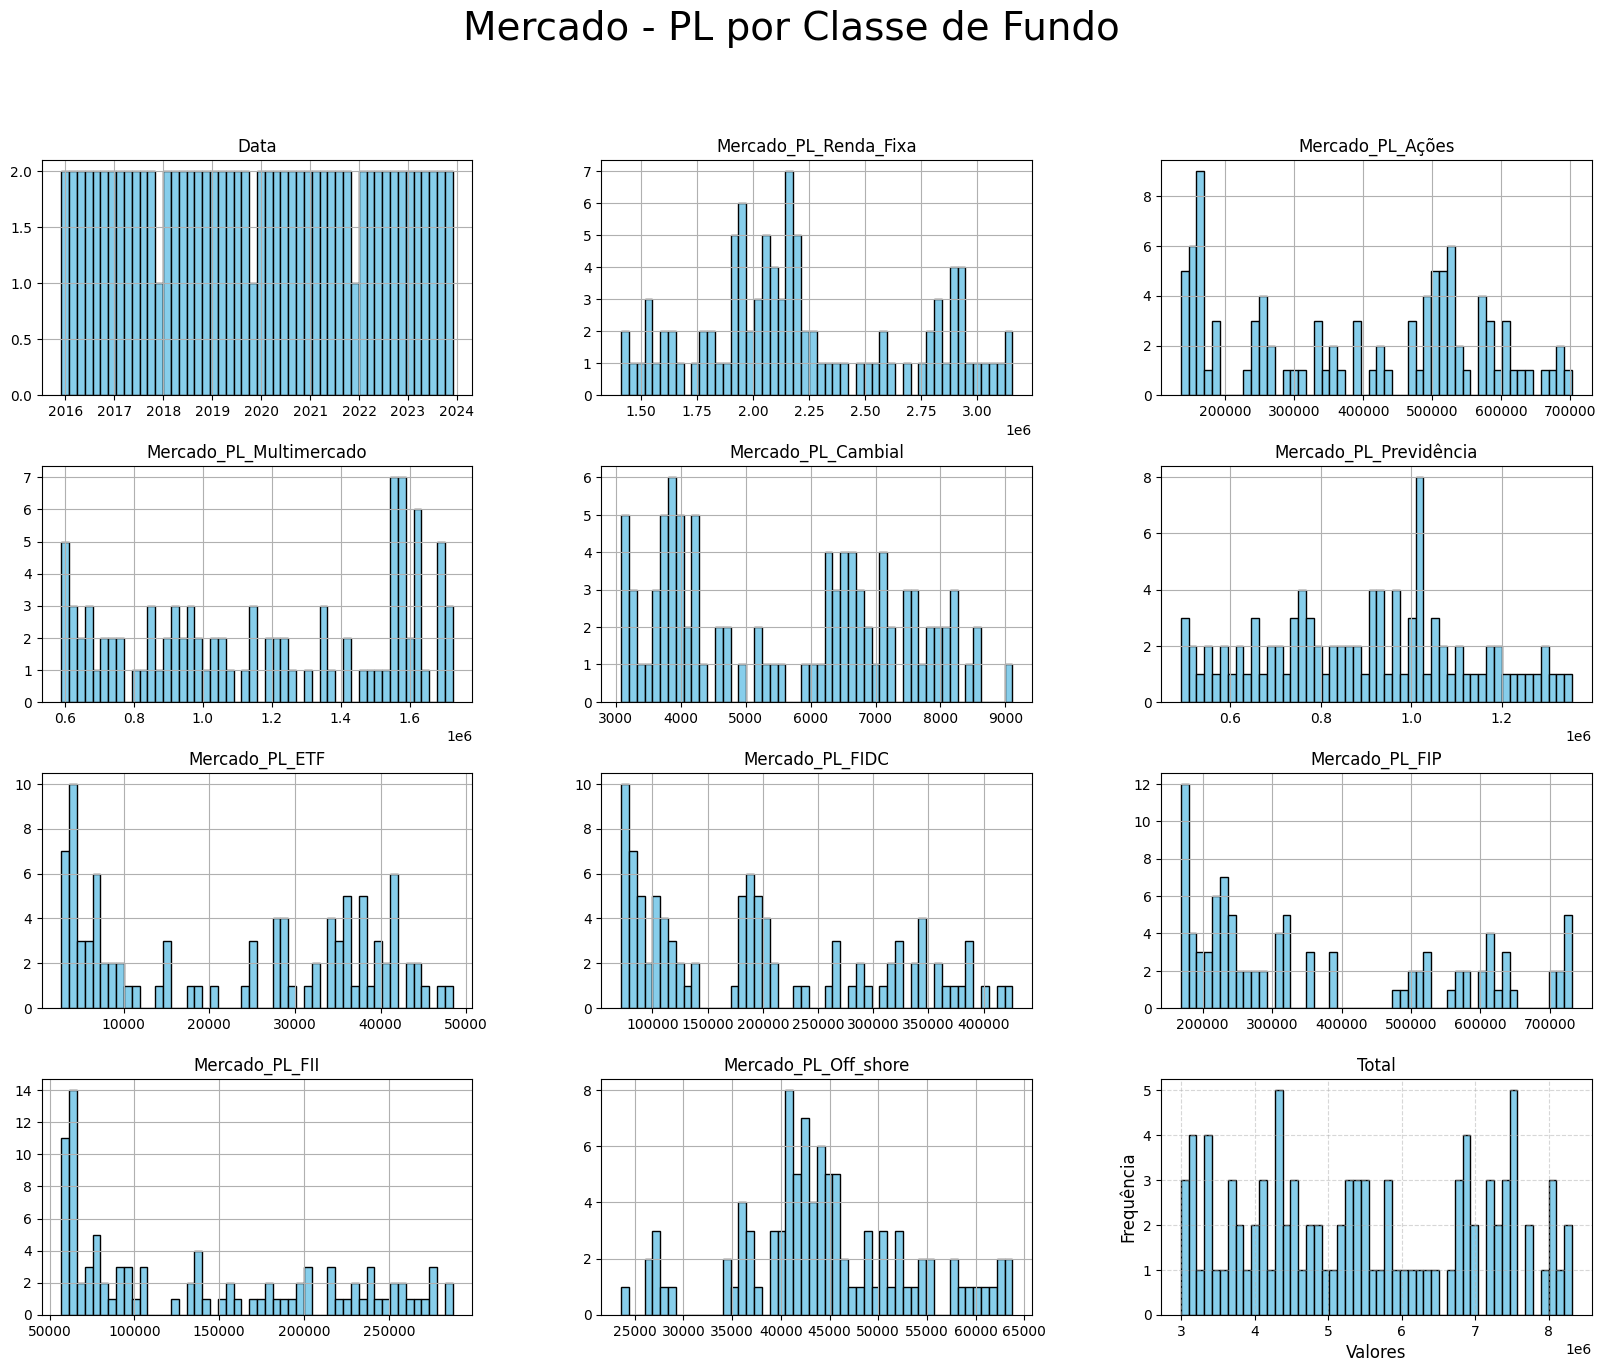

In [17]:
#Histograma dos dados da planilha "PL_por_Classe_Dados_Mercado_Fundos"

PL_por_Classe_Dados_Mercado_Fundos.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Mercado Agregado - PL por Classe de Fundo', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Histórico Dólar**

A tabela *Historico_Dolar* apresenta a cotação do Dólar Americano no fechamento de cada mês.

**Dólar** - Cotação do Dólar Americano (USD/BRL) no fechamento de cada mês.

In [ ]:
#Histórico Dólar - Head

Historico_Dolar.head()

,Data,Dólar
0,2023-12-01,4.8966
1,2023-11-01,4.8977
2,2023-10-01,5.0642
3,2023-09-01,4.9364
4,2023-08-01,4.9041


In [ ]:
#Histórico Dólar - Info

Historico_Dolar.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    99 non-null     datetime64[ns]
 1   Dólar   99 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [ ]:
#Histórico Dólar - Describe

Historico_Dolar.describe()

,Dólar
count,99.000000
mean,4.357299
std,0.864209
min,3.103600
25%,3.600350
50%,4.120900
75%,5.198050
max,5.650600


In [ ]:
#Histórico Dólar - Checagem de NA

Historico_Dolar.isnull().sum()

Data     0
Dólar    0
dtype: int64

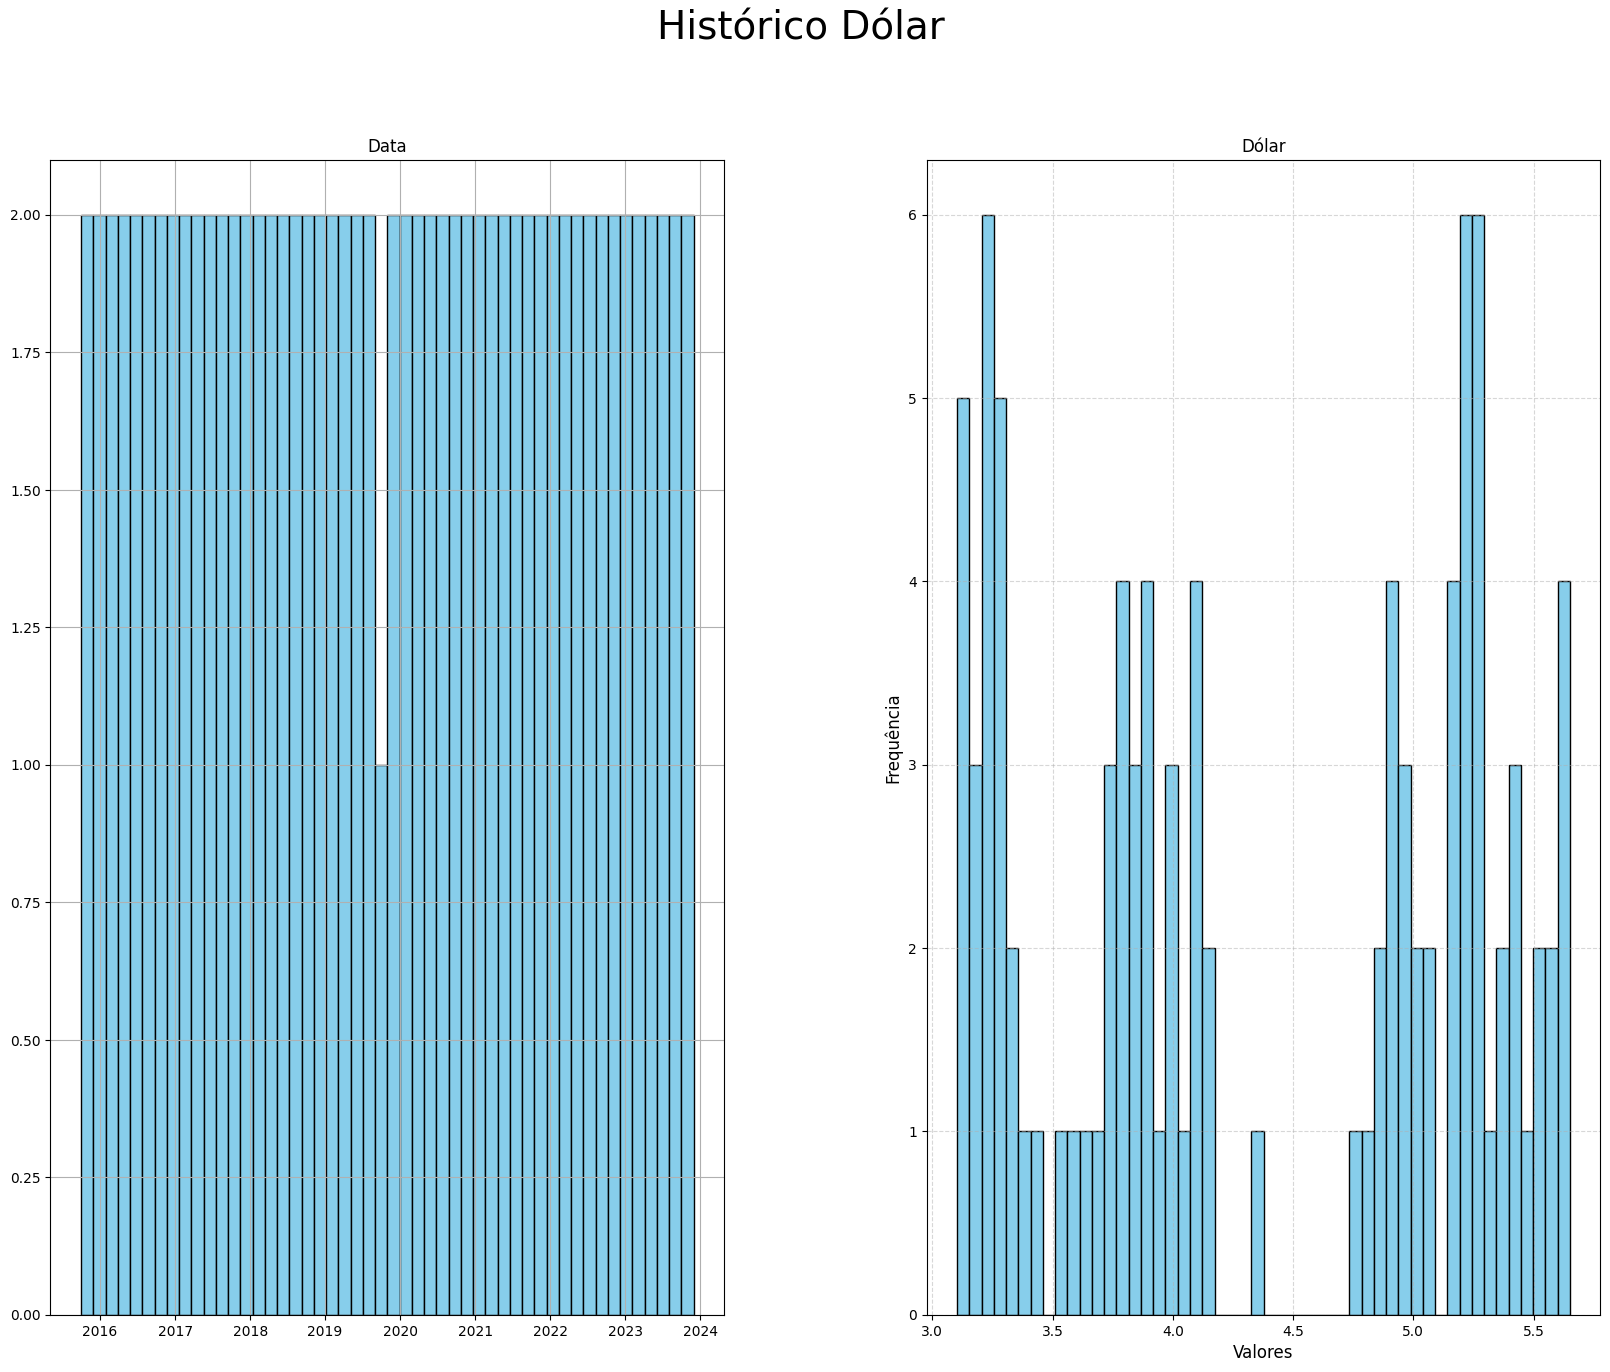

In [16]:
#Histograma dos dados da planilha "Historico_Dolar"

Historico_Dolar.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Histórico Dólar', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Histórico Ibovespa**

A tabela *Historico_Ibovespa* apresenta a pontuação do índice Ibovespa referente ao último dia útil de cada mês.

**Ibovespa** - Pontuação do índice Ibovespa referente ao último dia útil de cada mês.

In [ ]:
#Histórico Ibovespa - Head

Historico_Ibovespa.head()

,Data,Ibovespa
0,2023-12-01,134185.24
1,2023-11-01,127331.12
2,2023-10-01,113143.67
3,2023-09-01,116565.17
4,2023-08-01,115741.81


In [ ]:
#Histórico Ibovespa - Info

Historico_Ibovespa.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      99 non-null     datetime64[ns]
 1   Ibovespa  99 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [ ]:
#Histórico Ibovespa - Describe

Historico_Ibovespa.describe()

,Ibovespa
count,99.000000
mean,91597.945960
std,23807.286717
min,40405.000000
25%,72891.135000
50%,97393.740000
75%,110507.945000
max,134185.240000


In [ ]:
#Histórico Ibovespa - Checagem de NA

Historico_Ibovespa.isnull().sum()

Data        0
Ibovespa    0
dtype: int64

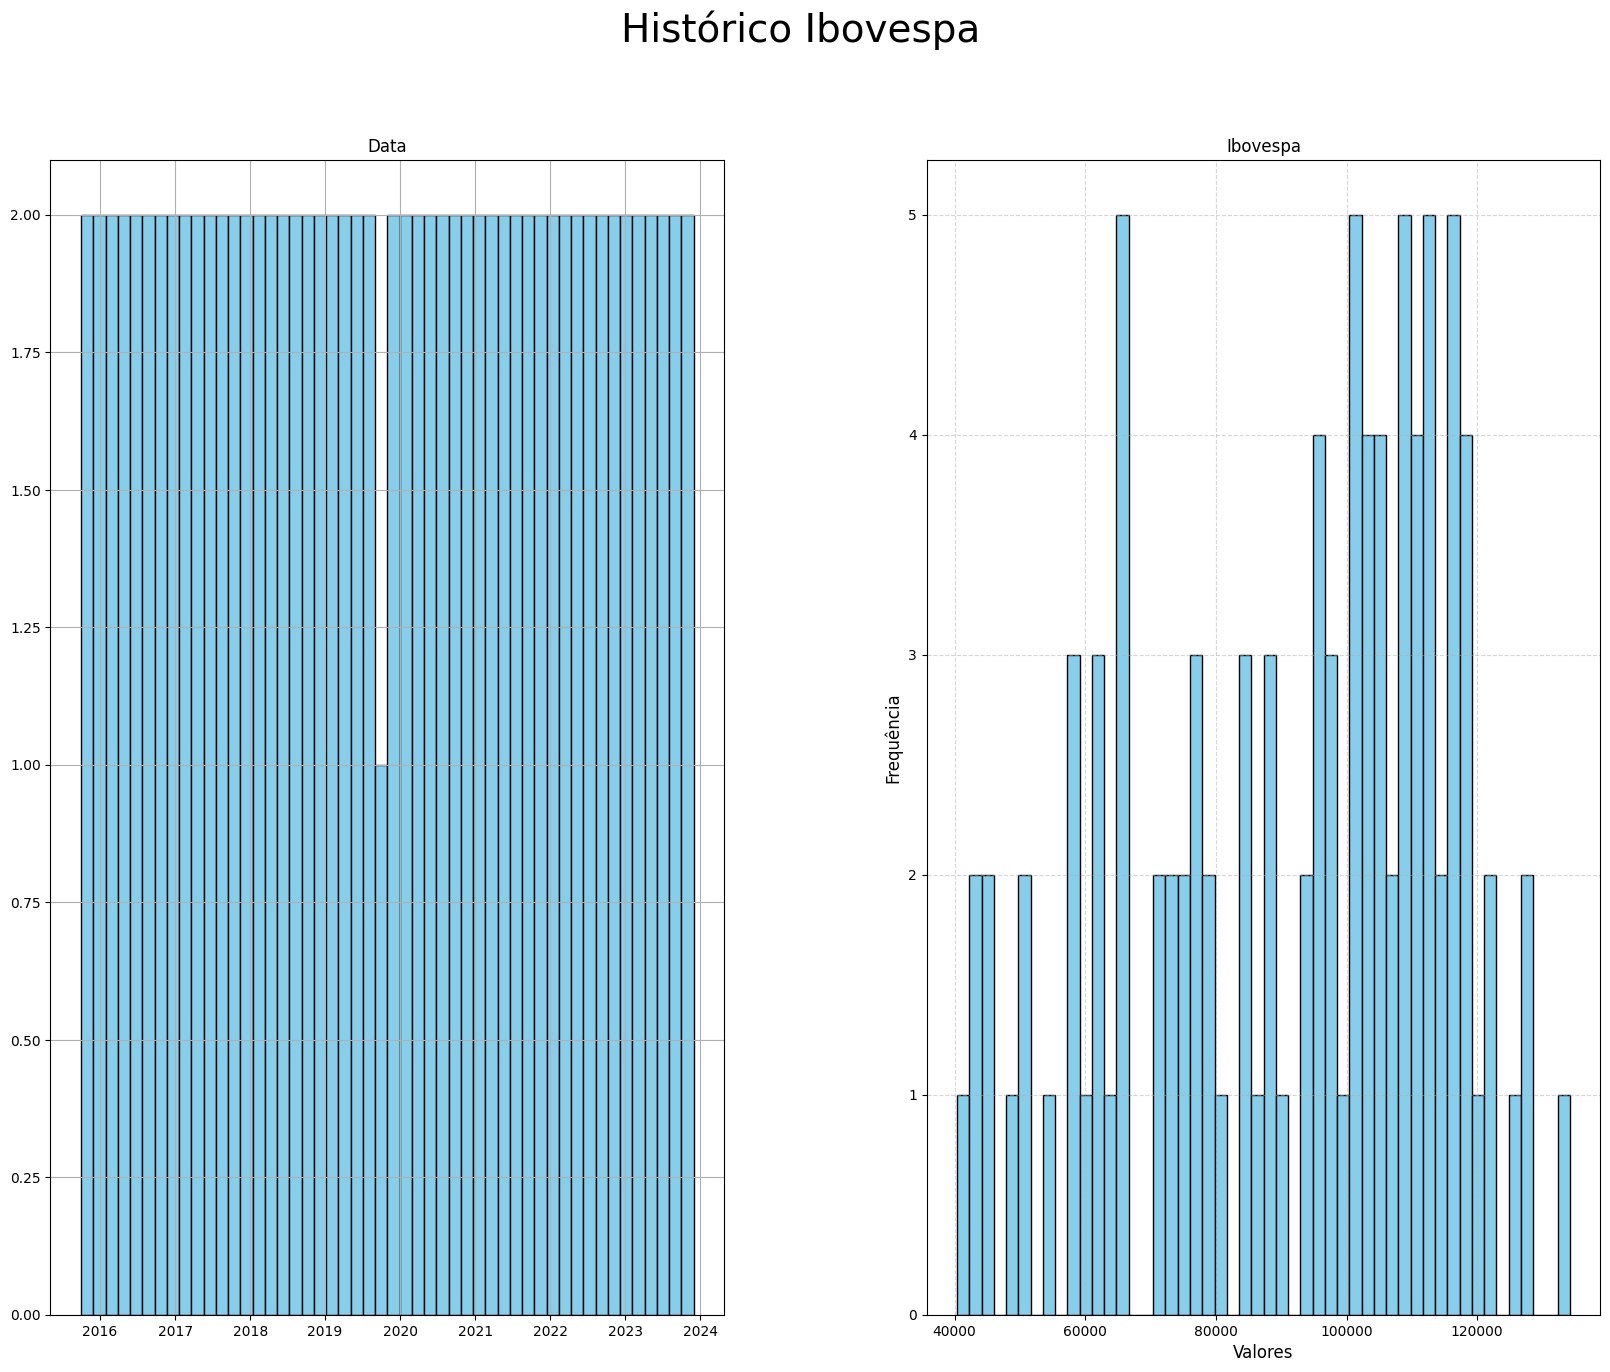

In [15]:
#Histograma dos dados da planilha "Historico_Ibovespa"

Historico_Ibovespa.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Histórico Ibovespa', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Histórico Selic**

A tabela *Historico_Selic* apresenta a taxa Selic de referência, válida no último dia do mês.

**Selic** - Apresenta a taxa Selic de referência no último dia do mês.

In [ ]:
#Histórico Selic - Head

Historico_Selic.head()

,Data,Selic
0,2023-12-01,11.75
1,2023-11-01,12.25
2,2023-10-01,12.75
3,2023-09-01,12.75
4,2023-08-01,13.25


In [ ]:
#Histórico Selic - Info

Historico_Selic.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    99 non-null     datetime64[ns]
 1   Selic   99 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [ ]:
#Histórico Selic - Describe

Historico_Selic.describe()

,Selic
count,99.000000
mean,8.929293
std,4.285125
min,2.000000
25%,6.125000
50%,7.750000
75%,13.750000
max,14.250000


In [ ]:
#Histórico Selic - Checagem de NA

Historico_Selic.isnull().sum()

Data     0
Selic    0
dtype: int64

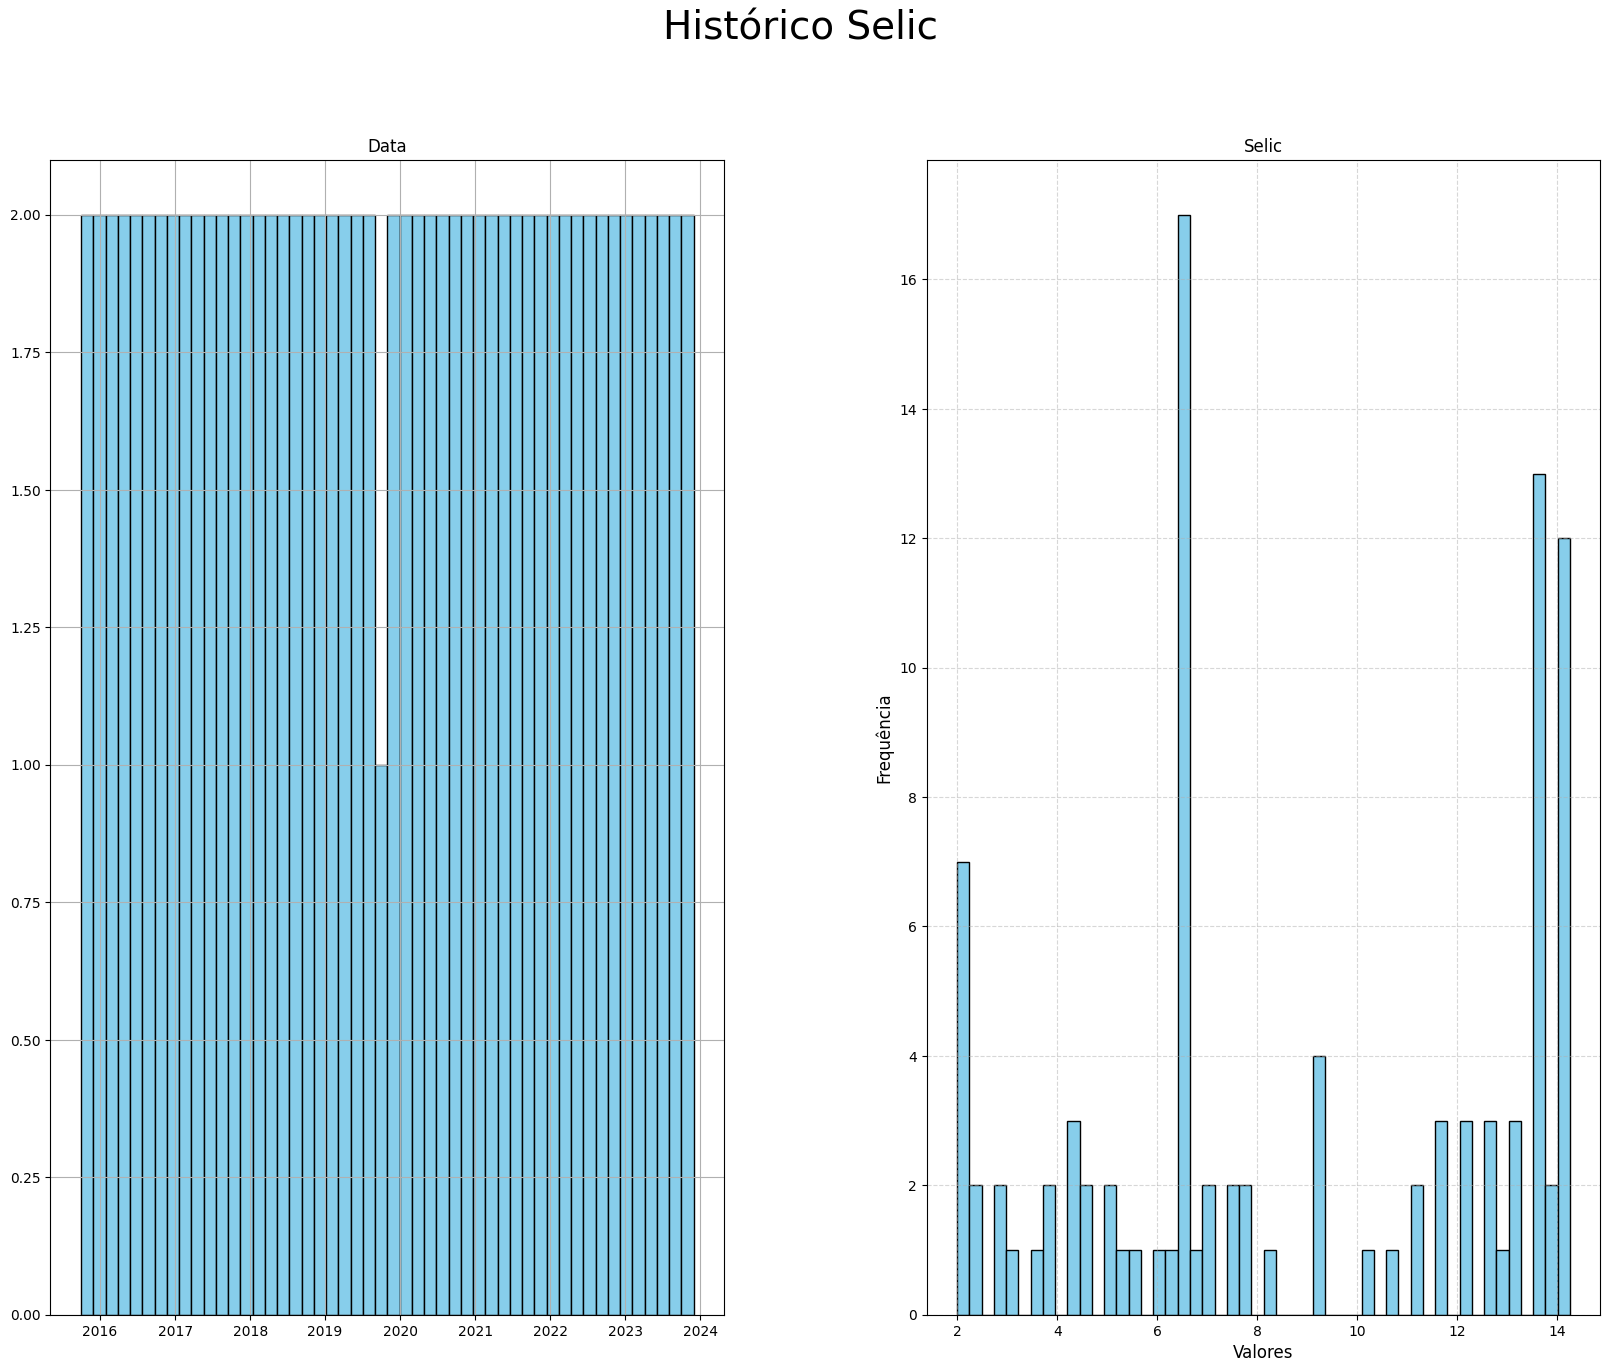

In [14]:
#Histograma dos dados da planilha "Histórico_Selic"

Historico_Selic.hist(bins=50, figsize=(20,15), color='skyblue', edgecolor='black')
plt.suptitle('Histórico Selic', fontsize=28)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()